In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Que 1

In [2]:
df1 = pd.read_csv("constituency_wise_results_2014.csv")
df1.head()


,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282


In [3]:
df2 = pd.read_csv("constituency_wise_results_2019.csv")
df2.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Aruku,KISHORE CHANDRA DEO,MALE,72.0,ST,TDP,Bicycle,336163,1938,338101,1451418
1,Andhra Pradesh,Aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,MALE,54.0,ST,BJP,Lotus,17578,289,17867,1451418
2,Andhra Pradesh,Aruku,GODDETI. MADHAVI,FEMALE,26.0,ST,YSRCP,Ceiling Fan,557561,4629,562190,1451418
3,Andhra Pradesh,Aruku,SHRUTI DEVI VYRICHERLA,FEMALE,46.0,ST,INC,Hand,17656,74,17730,1451418
4,Andhra Pradesh,Aruku,GANGULAIAH VAMPURU.,MALE,49.0,ST,JnP,Glass Tumbler,42245,549,42794,1451418


Voter turn out ratio  - how much percent of eligible voters voted in the election 

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8355 entries, 0 to 8354
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           8355 non-null   object 
 1   pc_name         8355 non-null   object 
 2   candidate       8355 non-null   object 
 3   sex             7845 non-null   object 
 4   age             7845 non-null   float64
 5   category        7845 non-null   object 
 6   party           8355 non-null   object 
 7   party_symbol    8355 non-null   object 
 8   general_votes   8355 non-null   int64  
 9   postal_votes    8355 non-null   int64  
 10  total_votes     8355 non-null   int64  
 11  total_electors  8355 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 783.4+ KB


In [5]:
df1.isnull().sum()

state               0
pc_name             0
candidate           0
sex               510
age               510
category          510
party               0
party_symbol        0
general_votes       0
postal_votes        0
total_votes         0
total_electors      0
dtype: int64

In [6]:
p = df1["pc_name"].nunique()
print("unique constituencies:",p)


unique constituencies: 508


In [7]:
cons = pd.DataFrame({
    "state":df1["state"],
    "pc_name":df1["pc_name"],
    "total_votes":df1["total_votes"],
    "total_electors":df1["total_electors"]

})
cons.head()

,state,pc_name,total_votes,total_electors
0,Andhra Pradesh,Adilabad,430847,1386282
1,Andhra Pradesh,Adilabad,259557,1386282
2,Andhra Pradesh,Adilabad,184198,1386282
3,Andhra Pradesh,Adilabad,94420,1386282
4,Andhra Pradesh,Adilabad,41032,1386282


In [8]:
cons_2014 = cons.groupby(['state','pc_name']).agg({
    'total_votes': 'sum',       
    'total_electors': 'first'    
}).reset_index()
cons_2014.head()

,state,pc_name,total_votes,total_electors
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,190328,269360
1,Andhra Pradesh,Adilabad,1045839,1386282
2,Andhra Pradesh,Amalapuram,1120927,1357865
3,Andhra Pradesh,Anakapalli,1148072,1401474
4,Andhra Pradesh,Anantapur,1212145,1536894


In [9]:
cons_2014["voter_turn_out"] = (cons_2014["total_votes"])/(cons_2014["total_electors"])*100
cons_2014.head()
consti = cons_2014.copy()

In [10]:
cons_2014 = cons_2014.sort_values(by ="voter_turn_out",ascending=False)
cons_2014

,state,pc_name,total_votes,total_electors,voter_turn_out
47,Assam,Dhubri,1369624,1550166,88.353376
302,Nagaland,Nagaland,1038910,1182972,87.822028
509,West Bengal,Tamluk,1337684,1527273,87.586437
481,West Bengal,Bishnupur,1272070,1466921,86.717008
212,Lakshadweep,Lakshadweep,43239,49922,86.613116
...,...,...,...,...,...
86,Bihar,Patna Sahib,882262,1946249,45.331404
259,Maharashtra,Kalyan,824196,1922034,42.881447
145,Jammu & Kashmir,Baramulla,465992,1190766,39.133801
144,Jammu & Kashmir,Anantnag,375279,1301143,28.842256


In [11]:
top5_2014 = cons_2014.head()
top5_2014



,state,pc_name,total_votes,total_electors,voter_turn_out
47,Assam,Dhubri,1369624,1550166,88.353376
302,Nagaland,Nagaland,1038910,1182972,87.822028
509,West Bengal,Tamluk,1337684,1527273,87.586437
481,West Bengal,Bishnupur,1272070,1466921,86.717008
212,Lakshadweep,Lakshadweep,43239,49922,86.613116


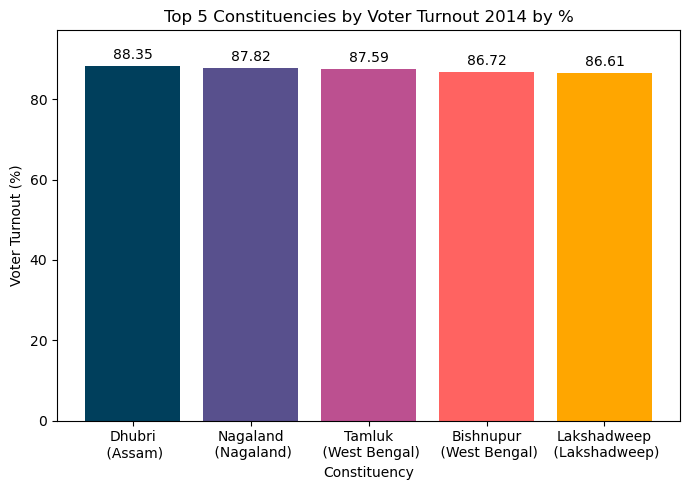

In [12]:
colors = [ '#003f5c',  '#58508d',  '#bc5090',  '#ff6361' ,  '#ffa600']

plt.figure(figsize=(7,5))
bars = plt.bar(top5_2014["pc_name"] + '\n (' + top5_2014['state'] + ')', top5_2014["voter_turn_out"], color=colors)
plt.xlabel('Constituency')
plt.ylabel('Voter Turnout (%)')
plt.title('Top 5 Constituencies by Voter Turnout 2014 by %')
plt.tight_layout()

for bar, value in zip(bars, top5_2014["voter_turn_out"]):
    plt.annotate(f'{value:.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', fontsize=10)
plt.ylim(0, max(top5_2014["voter_turn_out"]) * 1.1) 
plt.show()


In [13]:
bottom_2014 = cons_2014.tail()
bottom_2014.head()

,state,pc_name,total_votes,total_electors,voter_turn_out
86,Bihar,Patna Sahib,882262,1946249,45.331404
259,Maharashtra,Kalyan,824196,1922034,42.881447
145,Jammu & Kashmir,Baramulla,465992,1190766,39.133801
144,Jammu & Kashmir,Anantnag,375279,1301143,28.842256
148,Jammu & Kashmir,Srinagar,312212,1207230,25.861849


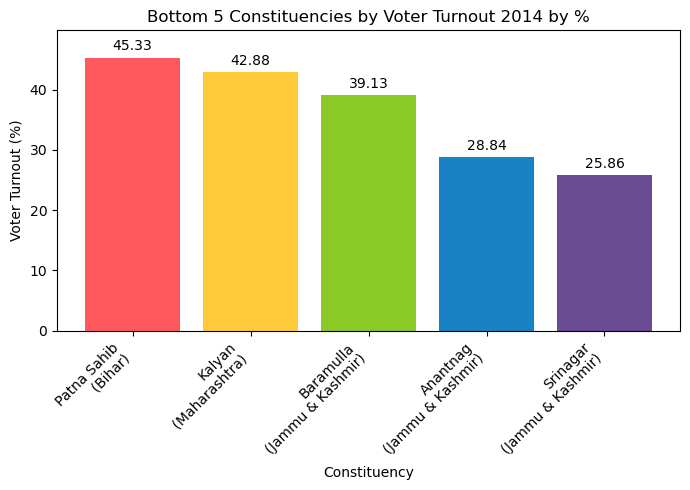

In [14]:
colors = [ '#ff595e',  '#ffca3a',  '#8ac926',  '#1982c4' ,  '#6a4c93']

plt.figure(figsize=(7,5))
bars = plt.bar(bottom_2014["pc_name"] + '\n (' + bottom_2014['state'] + ')', bottom_2014["voter_turn_out"], color=colors)
plt.xlabel('Constituency')
plt.ylabel('Voter Turnout (%)')
plt.title('Bottom 5 Constituencies by Voter Turnout 2014 by %')
plt.xticks(rotation = 45,ha ="right")
plt.tight_layout()

for bar, value in zip(bars, bottom_2014["voter_turn_out"]):
    plt.annotate(f'{value:.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', fontsize=10)
plt.ylim(0, max(bottom_2014["voter_turn_out"]) * 1.1) 
plt.show()


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           8597 non-null   object 
 1   pc_name         8597 non-null   object 
 2   candidate       8597 non-null   object 
 3   sex             8054 non-null   object 
 4   age             8054 non-null   float64
 5   category        8054 non-null   object 
 6   party           8597 non-null   object 
 7   party_symbol    8054 non-null   object 
 8   general_votes   8597 non-null   int64  
 9   postal_votes    8597 non-null   int64  
 10  total_votes     8597 non-null   int64  
 11  total_electors  8597 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 806.1+ KB


In [16]:
df2["state"].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chhattisgarh', 'Jharkhand', 'Uttarakhand',
       'Telangana', 'Andaman & Nicobar Islands', 'Chandigarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'NCT OF Delhi',
       'Lakshadweep', 'Puducherry'], dtype=object)

In [17]:
cons_9 = pd.DataFrame({
    "state":df2["state"],
    "pc_name":df2["pc_name"],
    "total_votes":df2["total_votes"],
    "total_electors":df2["total_electors"]

})
cons_9.head()

,state,pc_name,total_votes,total_electors
0,Andhra Pradesh,Aruku,338101,1451418
1,Andhra Pradesh,Aruku,17867,1451418
2,Andhra Pradesh,Aruku,562190,1451418
3,Andhra Pradesh,Aruku,17730,1451418
4,Andhra Pradesh,Aruku,42794,1451418


In [18]:
cons_9 = cons_9.groupby(['state','pc_name']).agg({
    'total_votes': 'sum',       
    'total_electors': 'first'    
}).reset_index()
cons_9.head()

,state,pc_name,total_votes,total_electors
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,207296,318471
1,Andhra Pradesh,Amalapuram,1232895,1459556
2,Andhra Pradesh,Anakapalli,1238491,1521363
3,Andhra Pradesh,Anantapur,1342306,1664160
4,Andhra Pradesh,Aruku,1074538,1451418


In [19]:
cons_9["voter_turn_out"] = (cons_9["total_votes"])/(cons_9["total_electors"])*100
cons_9.head()
consti_19 = cons_9.copy()

In [20]:
cons_9= cons_9.sort_values(by ="voter_turn_out",ascending=False)
cons_9

,state,pc_name,total_votes,total_electors,voter_turn_out
30,Assam,Dhubri,1685005,1858566,90.661564
514,West Bengal,Bishnupur,1420648,1627199,87.306347
29,Assam,Barpeta,1458549,1685149,86.553118
524,West Bengal,Jalpaiguri,1500922,1735464,86.485343
26,Arunachal Pradesh,ARUNACHAL EAST,293781,339788,86.460087
...,...,...,...,...,...
253,Maharashtra,Kalyan,890313,1965676,45.292968
400,Telangana,Hyderabad,877872,1957931,44.836718
139,Jammu & Kashmir,Baramulla,455550,1317738,34.570605
142,Jammu & Kashmir,Srinagar,186832,1294671,14.430848


In [21]:
top5_2019 = cons_9.head()
top5_2019



,state,pc_name,total_votes,total_electors,voter_turn_out
30,Assam,Dhubri,1685005,1858566,90.661564
514,West Bengal,Bishnupur,1420648,1627199,87.306347
29,Assam,Barpeta,1458549,1685149,86.553118
524,West Bengal,Jalpaiguri,1500922,1735464,86.485343
26,Arunachal Pradesh,ARUNACHAL EAST,293781,339788,86.460087


In [22]:
bottom5_2019 = cons_9.tail()
bottom5_2019

,state,pc_name,total_votes,total_electors,voter_turn_out
253,Maharashtra,Kalyan,890313,1965676,45.292968
400,Telangana,Hyderabad,877872,1957931,44.836718
139,Jammu & Kashmir,Baramulla,455550,1317738,34.570605
142,Jammu & Kashmir,Srinagar,186832,1294671,14.430848
138,Jammu & Kashmir,Anantnag,124896,1397779,8.935318


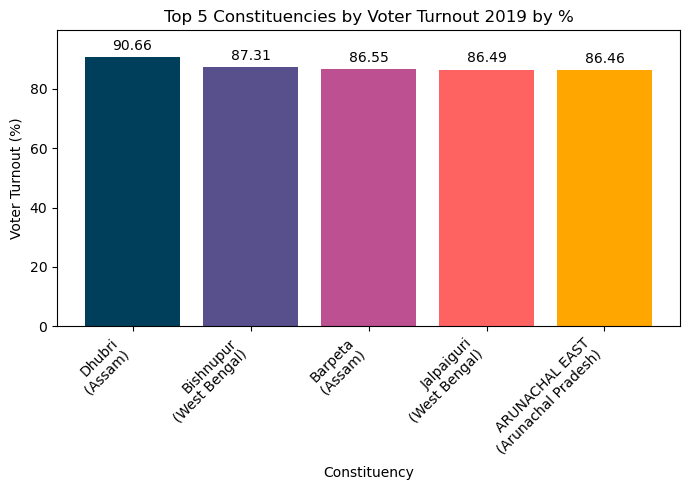

In [23]:
colors = [ '#003f5c',  '#58508d',  '#bc5090',  '#ff6361' ,  '#ffa600']

plt.figure(figsize=(7,5))
bars = plt.bar(top5_2019["pc_name"] + '\n (' + top5_2019['state'] + ')', top5_2019["voter_turn_out"], color=colors)
plt.xlabel('Constituency')
plt.ylabel('Voter Turnout (%)')
plt.title('Top 5 Constituencies by Voter Turnout 2019 by %')
plt.xticks(rotation = 45,ha ="right")
plt.tight_layout()

for bar, value in zip(bars, top5_2019["voter_turn_out"]):
    plt.annotate(f'{value:.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', fontsize=10)
plt.ylim(0, max(top5_2019["voter_turn_out"]) * 1.1) 
plt.show()


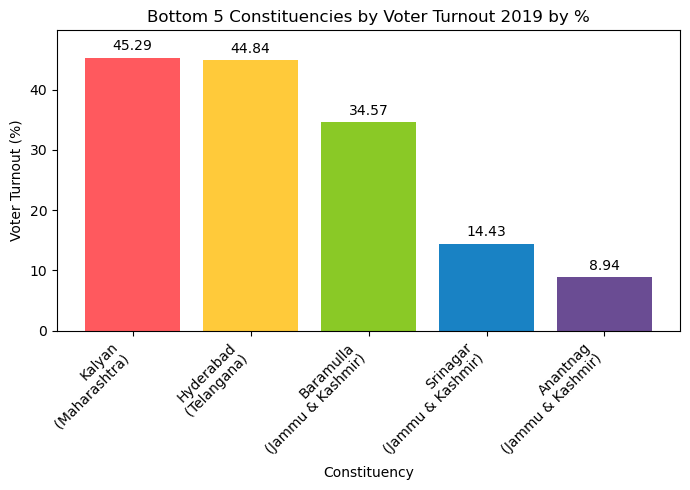

In [24]:
colors = [ '#ff595e',  '#ffca3a',  '#8ac926',  '#1982c4' ,  '#6a4c93']

plt.figure(figsize=(7,5))
bars = plt.bar(bottom5_2019["pc_name"] + '\n (' + bottom5_2019['state'] + ')', bottom5_2019["voter_turn_out"], color=colors)
plt.xlabel('Constituency')
plt.ylabel('Voter Turnout (%)')
plt.title('Bottom 5 Constituencies by Voter Turnout 2019 by %')
plt.xticks(rotation = 45,ha ="right")
plt.tight_layout()

for bar, value in zip(bars, bottom5_2019["voter_turn_out"]):
    plt.annotate(f'{value:.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', fontsize=10)
plt.ylim(0, max(bottom5_2019["voter_turn_out"]) * 1.1) 
plt.show()


Que 2

In [12]:
state = pd.DataFrame({
    "state":df1["state"],
    "total_votes":df1["total_votes"],
    "total_electors":df1["total_electors"]

})
state.head()

,state,total_votes,total_electors
0,Andhra Pradesh,430847,1386282
1,Andhra Pradesh,259557,1386282
2,Andhra Pradesh,184198,1386282
3,Andhra Pradesh,94420,1386282
4,Andhra Pradesh,41032,1386282


In [13]:
state_2014 = state.groupby('state').agg({
    'total_votes': 'sum',       
    'total_electors': lambda x: x.unique().sum()    
}).reset_index()
state_2014.head()

,state,total_votes,total_electors
0,Andaman & Nicobar Islands,190328,269360
1,Andhra Pradesh,48367188,64934138
2,Arunachal Pradesh,596956,759344
3,Assam,15085883,18837713
4,Bihar,35885332,63800160


In [14]:
state_2014["voter_turnout"] = (state_2014["total_votes"]/state_2014["total_electors"])*100
state_2014.head()

,state,total_votes,total_electors,voter_turnout
0,Andaman & Nicobar Islands,190328,269360,70.659341
1,Andhra Pradesh,48367188,64934138,74.486533
2,Arunachal Pradesh,596956,759344,78.614699
3,Assam,15085883,18837713,80.083410
4,Bihar,35885332,63800160,56.246461


In [15]:
state_2014 = state_2014.sort_values(by ="voter_turnout",ascending=False)
state_2014.head()

,state,total_votes,total_electors,voter_turnout
23,Nagaland,1038910,1182972,87.822028
16,Lakshadweep,43239,49922,86.613116
29,Tripura,2023829,2388822,84.720795
6,Dadra & Nagar Haveli,165286,196597,84.073511
27,Sikkim,308967,370770,83.331176


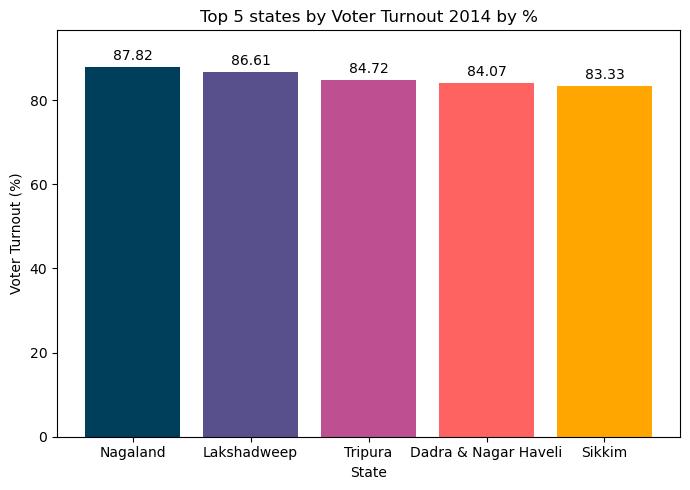

In [29]:
colors = [ '#003f5c',  '#58508d',  '#bc5090',  '#ff6361' ,  '#ffa600']

plt.figure(figsize=(7,5))
bars = plt.bar(state_2014.head()['state'] , state_2014.head()["voter_turnout"], color=colors)
plt.xlabel('State')
plt.ylabel('Voter Turnout (%)')
plt.title('Top 5 states by Voter Turnout 2014 by %')
plt.tight_layout()

for bar, value in zip(bars, state_2014.head()["voter_turnout"]):
    plt.annotate(f'{value:.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', fontsize=10)
plt.ylim(0, max(state_2014.head()["voter_turnout"]) * 1.1) 
plt.show()


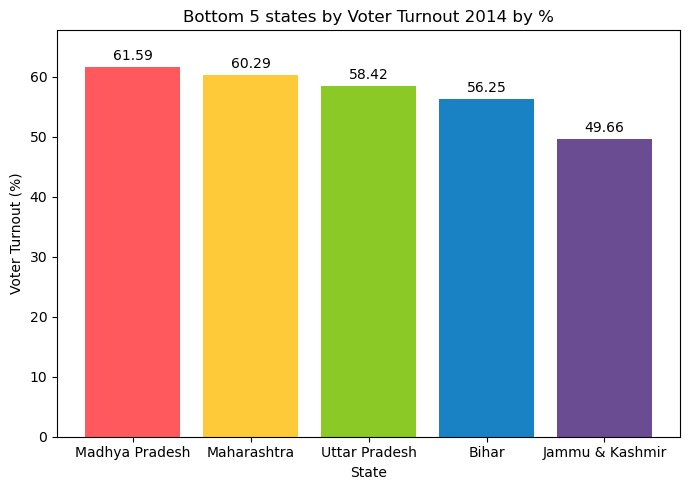

In [30]:
colors = [ '#ff595e',  '#ffca3a',  '#8ac926',  '#1982c4' ,  '#6a4c93']
plt.figure(figsize=(7,5))
bars = plt.bar(state_2014.tail()['state'] , state_2014.tail()["voter_turnout"], color=colors)
plt.xlabel('State')
plt.ylabel('Voter Turnout (%)')
plt.title('Bottom 5 states by Voter Turnout 2014 by %')
plt.tight_layout()

for bar, value in zip(bars, state_2014.tail()["voter_turnout"]):
    plt.annotate(f'{value:.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', fontsize=10)
plt.ylim(0, max(state_2014.tail()["voter_turnout"]) * 1.1) 
plt.show()


In [211]:
state_2019 = pd.DataFrame({
    "state":df2["state"],
    "total_votes":df2["total_votes"],
    "total_electors":df2["total_electors"]

})
state_2019.head()

,state,total_votes,total_electors
0,Andhra Pradesh,338101,1451418
1,Andhra Pradesh,17867,1451418
2,Andhra Pradesh,562190,1451418
3,Andhra Pradesh,17730,1451418
4,Andhra Pradesh,42794,1451418


In [215]:
state_2019 = state_2019.groupby('state').agg({
    'total_votes': 'sum',       
    'total_electors': lambda x: x.unique().sum()    
}).reset_index()
state_2019.head()

,state,total_votes,total_electors
0,Andaman & Nicobar Islands,207296,318471
1,Andhra Pradesh,31612534,39405967
2,Arunachal Pradesh,652091,803563
3,Assam,17986066,22050059
4,Bihar,40806661,71216290


In [33]:
state_2019["voter_turnout"] = (state_2019["total_votes"]/state_2019["total_electors"])*100
state_2019.head()

,state,total_votes,total_electors,voter_turnout
0,Andaman & Nicobar Islands,207296,318471,65.091013
1,Andhra Pradesh,31612534,39405967,80.222708
2,Arunachal Pradesh,652091,803563,81.149953
3,Assam,17986066,22050059,81.569242
4,Bihar,40806661,71216290,57.299616


In [34]:
state_2019 = state_2019.sort_values(by ="voter_turnout",ascending=False)
state_2019.head()

,state,total_votes,total_electors,voter_turnout
17,Lakshadweep,47009,55189,85.178206
24,Nagaland,1006357,1213777,82.911194
20,Manipur,1617330,1959563,82.535239
32,Tripura,2153172,2614718,82.348154
35,West Bengal,57206976,70001284,81.722752


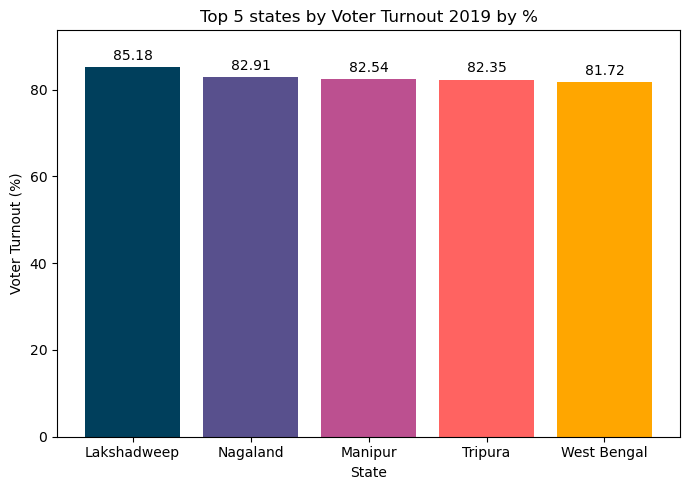

In [35]:
colors = [ '#003f5c',  '#58508d',  '#bc5090',  '#ff6361' ,  '#ffa600']

plt.figure(figsize=(7,5))
bars = plt.bar(state_2019.head()['state'] ,state_2019.head()["voter_turnout"], color=colors)
plt.xlabel('State')
plt.ylabel('Voter Turnout (%)')
plt.title('Top 5 states by Voter Turnout 2019 by %')
plt.tight_layout()

for bar, value in zip(bars,state_2019.head()["voter_turnout"]):
    plt.annotate(f'{value:.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', fontsize=10)
plt.ylim(0, max(state_2019.head()["voter_turnout"]) * 1.1) 
plt.show()


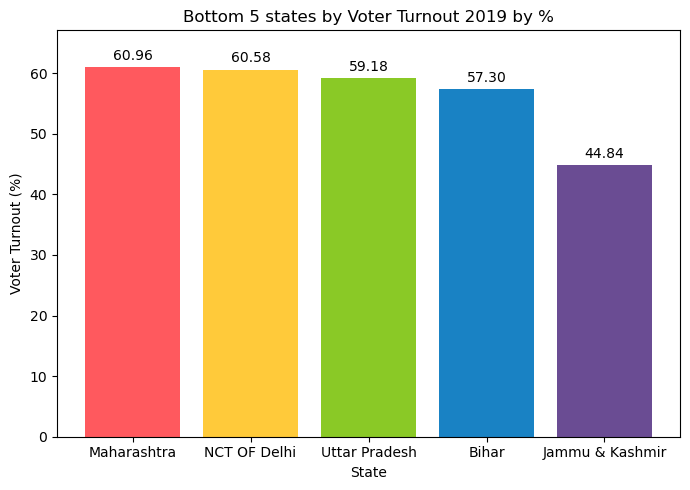

In [36]:
colors = [ '#ff595e',  '#ffca3a',  '#8ac926',  '#1982c4' ,  '#6a4c93']
plt.figure(figsize=(7,5))
bars = plt.bar(state_2019.tail()['state'] ,state_2019.tail()["voter_turnout"], color=colors)
plt.xlabel('State')
plt.ylabel('Voter Turnout (%)')
plt.title('Bottom 5 states by Voter Turnout 2019 by %')
plt.tight_layout()

for bar, value in zip(bars,state_2019.tail()["voter_turnout"]):
    plt.annotate(f'{value:.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', fontsize=10)
plt.ylim(0, max(state_2019.tail()["voter_turnout"]) * 1.1) 
plt.show()


Que5

In [37]:
grouped = df1.groupby(['state', 'pc_name']).apply(lambda x: x.sort_values(by='total_votes', ascending=False)).reset_index(drop=True)

In [38]:
results = []

for (state, pc_name), group in grouped.groupby(['state', 'pc_name']):
    winner = group.iloc[0]
    runner_up = group.iloc[1]
    
   
    results.append({
        'state': state,
        'pc_name': pc_name,
        'winning_party': winner['party'],
        'winning_candidate': winner['candidate'],
        'winner_votes': winner['total_votes'],
        'runner_up_party': runner_up['party'],
        'runner_up_candidate': runner_up['candidate'],
        'runner_up_votes': runner_up['total_votes'],
        'vote_difference': winner['total_votes'] - runner_up['total_votes']
    })


results_df = pd.DataFrame(results)
results_df.head()


,state,pc_name,winning_party,winning_candidate,winner_votes,runner_up_party,runner_up_candidate,runner_up_votes,vote_difference
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BJP,BISHNU PADA RAY,90969,INC,KULDEEP RAI SHARMA,83157,7812
1,Andhra Pradesh,Adilabad,TRS,GODAM NAGESH,430847,INC,NARESH,259557,171290
2,Andhra Pradesh,Amalapuram,TDP,DR PANDULA RAVINDRA BABU,594547,YSRCP,PINIPE VISWARUPU,473971,120576
3,Andhra Pradesh,Anakapalli,TDP,MUTTAMSETTI SRINIVASA RAO (AVANTHI),568463,YSRCP,GUDIVADA AMARNADH,520531,47932
4,Andhra Pradesh,Anantapur,TDP,J.C. DIVAKAR REDDI,610288,YSRCP,ANANTHA VENKATARAMIREDDY,548297,61991


In [39]:
results_df.insert(loc=9, column='total_votes_consti', value=consti['total_votes'])
results_df.head()


,state,pc_name,winning_party,winning_candidate,winner_votes,runner_up_party,runner_up_candidate,runner_up_votes,vote_difference,total_votes_consti
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BJP,BISHNU PADA RAY,90969,INC,KULDEEP RAI SHARMA,83157,7812,190328
1,Andhra Pradesh,Adilabad,TRS,GODAM NAGESH,430847,INC,NARESH,259557,171290,1045839
2,Andhra Pradesh,Amalapuram,TDP,DR PANDULA RAVINDRA BABU,594547,YSRCP,PINIPE VISWARUPU,473971,120576,1120927
3,Andhra Pradesh,Anakapalli,TDP,MUTTAMSETTI SRINIVASA RAO (AVANTHI),568463,YSRCP,GUDIVADA AMARNADH,520531,47932,1148072
4,Andhra Pradesh,Anantapur,TDP,J.C. DIVAKAR REDDI,610288,YSRCP,ANANTHA VENKATARAMIREDDY,548297,61991,1212145


In [40]:
results_df.drop(columns="total_votes_consti",inplace=True)

In [41]:
results_df.head()

,state,pc_name,winning_party,winning_candidate,winner_votes,runner_up_party,runner_up_candidate,runner_up_votes,vote_difference
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BJP,BISHNU PADA RAY,90969,INC,KULDEEP RAI SHARMA,83157,7812
1,Andhra Pradesh,Adilabad,TRS,GODAM NAGESH,430847,INC,NARESH,259557,171290
2,Andhra Pradesh,Amalapuram,TDP,DR PANDULA RAVINDRA BABU,594547,YSRCP,PINIPE VISWARUPU,473971,120576
3,Andhra Pradesh,Anakapalli,TDP,MUTTAMSETTI SRINIVASA RAO (AVANTHI),568463,YSRCP,GUDIVADA AMARNADH,520531,47932
4,Andhra Pradesh,Anantapur,TDP,J.C. DIVAKAR REDDI,610288,YSRCP,ANANTHA VENKATARAMIREDDY,548297,61991


2014 -top candidates 

In [42]:
results_2014 = results_df.sort_values(by ="vote_difference",ascending=False)
results_2014.head()

,state,pc_name,winning_party,winning_candidate,winner_votes,runner_up_party,runner_up_candidate,runner_up_votes,vote_difference
128,Gujarat,Vadodara,BJP,NARENDRA MODI,845464,INC,MISTRI MADHUSUDAN DEVRAM,275336,570128
417,Uttar Pradesh,Ghaziabad,BJP,VIJAY KUMAR SINGH,758482,INC,RAJ BABBAR,191222,567260
120,Gujarat,Navsari,BJP,C. R. PATIL,820831,INC,MAKSUD MIRZA,262715,558116
329,Rajasthan,Jaipur,BJP,RAMCHARAN BOHARA,863358,INC,DR. MAHESH JOSHI,324013,539345
126,Gujarat,Surat,BJP,DARSHANA VIKRAM JARDOSH,718412,INC,DESAI NAISHADHBHAI BHUPATBHAI,185222,533190


In [43]:
results_df.rename(columns={'total_votes':"total_votes_consti"},inplace=True)
results_df.head()

,state,pc_name,winning_party,winning_candidate,winner_votes,runner_up_party,runner_up_candidate,runner_up_votes,vote_difference
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BJP,BISHNU PADA RAY,90969,INC,KULDEEP RAI SHARMA,83157,7812
1,Andhra Pradesh,Adilabad,TRS,GODAM NAGESH,430847,INC,NARESH,259557,171290
2,Andhra Pradesh,Amalapuram,TDP,DR PANDULA RAVINDRA BABU,594547,YSRCP,PINIPE VISWARUPU,473971,120576
3,Andhra Pradesh,Anakapalli,TDP,MUTTAMSETTI SRINIVASA RAO (AVANTHI),568463,YSRCP,GUDIVADA AMARNADH,520531,47932
4,Andhra Pradesh,Anantapur,TDP,J.C. DIVAKAR REDDI,610288,YSRCP,ANANTHA VENKATARAMIREDDY,548297,61991


In [44]:
grouped_19 = df2.groupby(['state', 'pc_name']).apply(lambda x: x.sort_values(by='total_votes', ascending=False)).reset_index(drop=True)

In [45]:
results = []

for (state, pc_name), group in grouped_19.groupby(['state', 'pc_name']):
    winner = group.iloc[0]
    runner_up = group.iloc[1]
    
   
    results.append({
        'state': state,
        'pc_name': pc_name,
        'winning_party': winner['party'],
        'winning_candidate': winner['candidate'],
        'winner_votes': winner['total_votes'],
        'runner_up_party': runner_up['party'],
        'runner_up_candidate': runner_up['candidate'],
        'runner_up_votes': runner_up['total_votes'],
        'vote_difference': winner['total_votes'] - runner_up['total_votes']
    })


results_df_19 = pd.DataFrame(results)
results_df_19.head()


,state,pc_name,winning_party,winning_candidate,winner_votes,runner_up_party,runner_up_candidate,runner_up_votes,vote_difference
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,INC,KULDEEP RAI SHARMA,95308,BJP,VISHAL JOLLY,93901,1407
1,Andhra Pradesh,Amalapuram,YSRCP,CHINTA ANURADHA,485958,TDP,GANTI HARISH MADHUR (BALAYOGI),446163,39795
2,Andhra Pradesh,Anakapalli,YSRCP,Dr.Beesetti Venkata Satyavathi,586226,TDP,ADARI ANAND KUMAR,497034,89192
3,Andhra Pradesh,Anantapur,YSRCP,TALARI RANGAIAH,695208,TDP,J.C. PAVAN REDDY,553780,141428
4,Andhra Pradesh,Aruku,YSRCP,GODDETI. MADHAVI,562190,TDP,KISHORE CHANDRA DEO,338101,224089


In [46]:
results_df_19["total_votes_consti"] = consti_19["total_votes"]
results_df_19.head()

,state,pc_name,winning_party,winning_candidate,winner_votes,runner_up_party,runner_up_candidate,runner_up_votes,vote_difference,total_votes_consti
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,INC,KULDEEP RAI SHARMA,95308,BJP,VISHAL JOLLY,93901,1407,207296
1,Andhra Pradesh,Amalapuram,YSRCP,CHINTA ANURADHA,485958,TDP,GANTI HARISH MADHUR (BALAYOGI),446163,39795,1232895
2,Andhra Pradesh,Anakapalli,YSRCP,Dr.Beesetti Venkata Satyavathi,586226,TDP,ADARI ANAND KUMAR,497034,89192,1238491
3,Andhra Pradesh,Anantapur,YSRCP,TALARI RANGAIAH,695208,TDP,J.C. PAVAN REDDY,553780,141428,1342306
4,Andhra Pradesh,Aruku,YSRCP,GODDETI. MADHAVI,562190,TDP,KISHORE CHANDRA DEO,338101,224089,1074538


2019 top candidates 

In [47]:
results_2019 = results_df_19.sort_values(by ="vote_difference",ascending=False)
results_2019.head()

,state,pc_name,winning_party,winning_candidate,winner_votes,runner_up_party,runner_up_candidate,runner_up_votes,vote_difference,total_votes_consti
114,Gujarat,Navsari,BJP,C. R. Patil,972739,INC,PATEL DHARMESHBHAI BHIMBHAI,283071,689668,1308018
129,Haryana,Karnal,BJP,Sanjay Bhatia,911594,INC,Kuldip Sharma,255452,656142,1300722
126,Haryana,Faridabad,BJP,KRISHAN PAL,913222,INC,AVTAR SINGH BHADANA,274983,638239,1327295
337,Rajasthan,Bhilwara,BJP,SUBHASH CHANDRA BAHERIA,938160,INC,RAM PAL SHARMA,326160,612000,1310513
122,Gujarat,Vadodara,BJP,RANJANBEN BHATT,883719,INC,PRASHANT PATEL (TIKO),294542,589177,1222348


In [48]:
merged_df = results_df_19.merge(results_df, on='pc_name')
merged_df.head()

,state_x,pc_name,winning_party_x,winning_candidate_x,winner_votes_x,runner_up_party_x,runner_up_candidate_x,runner_up_votes_x,vote_difference_x,total_votes_consti,state_y,winning_party_y,winning_candidate_y,winner_votes_y,runner_up_party_y,runner_up_candidate_y,runner_up_votes_y,vote_difference_y
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,INC,KULDEEP RAI SHARMA,95308,BJP,VISHAL JOLLY,93901,1407,207296,Andaman & Nicobar Islands,BJP,BISHNU PADA RAY,90969,INC,KULDEEP RAI SHARMA,83157,7812
1,Andhra Pradesh,Amalapuram,YSRCP,CHINTA ANURADHA,485958,TDP,GANTI HARISH MADHUR (BALAYOGI),446163,39795,1232895,Andhra Pradesh,TDP,DR PANDULA RAVINDRA BABU,594547,YSRCP,PINIPE VISWARUPU,473971,120576
2,Andhra Pradesh,Anakapalli,YSRCP,Dr.Beesetti Venkata Satyavathi,586226,TDP,ADARI ANAND KUMAR,497034,89192,1238491,Andhra Pradesh,TDP,MUTTAMSETTI SRINIVASA RAO (AVANTHI),568463,YSRCP,GUDIVADA AMARNADH,520531,47932
3,Andhra Pradesh,Anantapur,YSRCP,TALARI RANGAIAH,695208,TDP,J.C. PAVAN REDDY,553780,141428,1342306,Andhra Pradesh,TDP,J.C. DIVAKAR REDDI,610288,YSRCP,ANANTHA VENKATARAMIREDDY,548297,61991
4,Andhra Pradesh,Aruku,YSRCP,GODDETI. MADHAVI,562190,TDP,KISHORE CHANDRA DEO,338101,224089,1074538,Andhra Pradesh,YSRCP,KOTHAPALLI GEETHA,413191,TDP,GUMMIDI SANDHYARANI,321793,91398


In [49]:
same_party_df = merged_df[merged_df['winning_party_x'] == merged_df['winning_party_y']]
same_party_df.head()

,state_x,pc_name,winning_party_x,winning_candidate_x,winner_votes_x,runner_up_party_x,runner_up_candidate_x,runner_up_votes_x,vote_difference_x,total_votes_consti,state_y,winning_party_y,winning_candidate_y,winner_votes_y,runner_up_party_y,runner_up_candidate_y,runner_up_votes_y,vote_difference_y
4,Andhra Pradesh,Aruku,YSRCP,GODDETI. MADHAVI,562190,TDP,KISHORE CHANDRA DEO,338101,224089,1074538,Andhra Pradesh,YSRCP,KOTHAPALLI GEETHA,413191,TDP,GUMMIDI SANDHYARANI,321793,91398
8,Andhra Pradesh,Guntur,TDP,Jayadev Galla,587918,YSRCP,Modugula Venugopala Reddy,583713,4205,1351474,Andhra Pradesh,TDP,JAYADEV GALLA,618417,YSRCP,BALASHOWRY VALLABHANENI,549306,69111
10,Andhra Pradesh,Kadapa,YSRCP,Y.S.Avinash Reddy,783499,TDP,Adi Narayana Reddy Chadipirala,402773,380726,1228242,Andhra Pradesh,YSRCP,Y.S. AVINASH REDDY,671983,TDP,SRINIVASA REDDY REDDEPPAGARI,481660,190323
12,Andhra Pradesh,Kurnool,YSRCP,AYUSHMAN DOCTOR SANJEEV KUMAR,605462,TDP,KOTLA JAYA SURYA PRAKASH REDDY,456395,149067,1188327,Andhra Pradesh,YSRCP,BUTTA RENUKA,472782,TDP,B.T. NAIDU,428651,44131
14,Andhra Pradesh,Nandyal,YSRCP,POCHA . BRAHMANANDA REDDY,720888,TDP,MANDRA SIVANANDA REDDY,470769,250119,1299093,Andhra Pradesh,YSRCP,S.P.Y REDDY,622411,TDP,N.MD.FAROOK,516645,105766


In [50]:
same_party_df["winner_%vote"] = (same_party_df["winner_votes_x"]/same_party_df["total_votes_consti"])*100
same_party_df.head()

/var/folders/z5/m02ng2yj4nvg95mp0v6l1wtc0000gn/T/ipykernel_3404/36244692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_party_df["winner_%vote"] = (same_party_df["winner_votes_x"]/same_party_df["total_votes_consti"])*100


,state_x,pc_name,winning_party_x,winning_candidate_x,winner_votes_x,runner_up_party_x,runner_up_candidate_x,runner_up_votes_x,vote_difference_x,total_votes_consti,state_y,winning_party_y,winning_candidate_y,winner_votes_y,runner_up_party_y,runner_up_candidate_y,runner_up_votes_y,vote_difference_y,winner_%vote
4,Andhra Pradesh,Aruku,YSRCP,GODDETI. MADHAVI,562190,TDP,KISHORE CHANDRA DEO,338101,224089,1074538,Andhra Pradesh,YSRCP,KOTHAPALLI GEETHA,413191,TDP,GUMMIDI SANDHYARANI,321793,91398,52.319229
8,Andhra Pradesh,Guntur,TDP,Jayadev Galla,587918,YSRCP,Modugula Venugopala Reddy,583713,4205,1351474,Andhra Pradesh,TDP,JAYADEV GALLA,618417,YSRCP,BALASHOWRY VALLABHANENI,549306,69111,43.501984
10,Andhra Pradesh,Kadapa,YSRCP,Y.S.Avinash Reddy,783499,TDP,Adi Narayana Reddy Chadipirala,402773,380726,1228242,Andhra Pradesh,YSRCP,Y.S. AVINASH REDDY,671983,TDP,SRINIVASA REDDY REDDEPPAGARI,481660,190323,63.790279
12,Andhra Pradesh,Kurnool,YSRCP,AYUSHMAN DOCTOR SANJEEV KUMAR,605462,TDP,KOTLA JAYA SURYA PRAKASH REDDY,456395,149067,1188327,Andhra Pradesh,YSRCP,BUTTA RENUKA,472782,TDP,B.T. NAIDU,428651,44131,50.950790
14,Andhra Pradesh,Nandyal,YSRCP,POCHA . BRAHMANANDA REDDY,720888,TDP,MANDRA SIVANANDA REDDY,470769,250119,1299093,Andhra Pradesh,YSRCP,S.P.Y REDDY,622411,TDP,N.MD.FAROOK,516645,105766,55.491639


In [51]:
rank = same_party_df.sort_values(by ="winner_%vote",ascending=False)
rank.head()

,state_x,pc_name,winning_party_x,winning_candidate_x,winner_votes_x,runner_up_party_x,runner_up_candidate_x,runner_up_votes_x,vote_difference_x,total_votes_consti,state_y,winning_party_y,winning_candidate_y,winner_votes_y,runner_up_party_y,runner_up_candidate_y,runner_up_votes_y,vote_difference_y,winner_%vote
114,Gujarat,Surat,BJP,Darshana Vikram Jardosh,795651,INC,Ashok Patel (Adhevada),247421,548230,1068412,Gujarat,BJP,DARSHANA VIKRAM JARDOSH,718412,INC,DESAI NAISHADHBHAI BHUPATBHAI,185222,533190,74.470429
108,Gujarat,Navsari,BJP,C. R. Patil,972739,INC,PATEL DHARMESHBHAI BHIMBHAI,283071,689668,1308018,Gujarat,BJP,C. R. PATIL,820831,INC,MAKSUD MIRZA,262715,558116,74.367402
116,Gujarat,Vadodara,BJP,RANJANBEN BHATT,883719,INC,PRASHANT PATEL (TIKO),294542,589177,1222348,Gujarat,BJP,NARENDRA MODI,845464,INC,MISTRI MADHUSUDAN DEVRAM,275336,570128,72.296842
132,Himachal Pradesh,Kangra,BJP,Kishan Kapoor,725218,INC,Pawan Kajal,247595,477623,1006989,Himachal Pradesh,BJP,SHANTA KUMAR,456163,INC,CHANDER KUMAR,286091,170072,72.018463
312,Rajasthan,Bhilwara,BJP,SUBHASH CHANDRA BAHERIA,938160,INC,RAM PAL SHARMA,326160,612000,1310513,Rajasthan,BJP,SUBHASH BAHERIA,630317,INC,ASHOK CHANDNA,384053,246264,71.587233


In [52]:
rank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337 entries, 114 to 36
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state_x                337 non-null    object 
 1   pc_name                337 non-null    object 
 2   winning_party_x        337 non-null    object 
 3   winning_candidate_x    337 non-null    object 
 4   winner_votes_x         337 non-null    int64  
 5   runner_up_party_x      337 non-null    object 
 6   runner_up_candidate_x  337 non-null    object 
 7   runner_up_votes_x      337 non-null    int64  
 8   vote_difference_x      337 non-null    int64  
 9   total_votes_consti     337 non-null    int64  
 10  state_y                337 non-null    object 
 11  winning_party_y        337 non-null    object 
 12  winning_candidate_y    337 non-null    object 
 13  winner_votes_y         337 non-null    int64  
 14  runner_up_party_y      337 non-null    object 
 15  runner_up_

In 337 constituencies ,same party won consecutive elections 

In [53]:
rank_final = pd.DataFrame({
    "state":rank["state_x"],
    "pc_name":rank["pc_name"],
    "winning_party":rank["winning_party_x"],
    "winner_vote(%)":rank["winner_%vote"]
})
rank_final.head()

,state,pc_name,winning_party,winner_vote(%)
114,Gujarat,Surat,BJP,74.470429
108,Gujarat,Navsari,BJP,74.367402
116,Gujarat,Vadodara,BJP,72.296842
132,Himachal Pradesh,Kangra,BJP,72.018463
312,Rajasthan,Bhilwara,BJP,71.587233


que 4

In [ ]:
different_party_df = merged_df[merged_df['winning_party_x'] != merged_df['winning_party_y']]
different_party_df.head()

,state_x,pc_name,winning_party_x,winning_candidate_x,winner_votes_x,runner_up_party_x,runner_up_candidate_x,runner_up_votes_x,vote_difference_x,total_votes_consti,state_y,winning_party_y,winning_candidate_y,winner_votes_y,runner_up_party_y,runner_up_candidate_y,runner_up_votes_y,vote_difference_y
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,INC,KULDEEP RAI SHARMA,95308,BJP,VISHAL JOLLY,93901,1407,207296,Andaman & Nicobar Islands,BJP,BISHNU PADA RAY,90969,INC,KULDEEP RAI SHARMA,83157,7812
1,Andhra Pradesh,Amalapuram,YSRCP,CHINTA ANURADHA,485958,TDP,GANTI HARISH MADHUR (BALAYOGI),446163,39795,1232895,Andhra Pradesh,TDP,DR PANDULA RAVINDRA BABU,594547,YSRCP,PINIPE VISWARUPU,473971,120576
2,Andhra Pradesh,Anakapalli,YSRCP,Dr.Beesetti Venkata Satyavathi,586226,TDP,ADARI ANAND KUMAR,497034,89192,1238491,Andhra Pradesh,TDP,MUTTAMSETTI SRINIVASA RAO (AVANTHI),568463,YSRCP,GUDIVADA AMARNADH,520531,47932
3,Andhra Pradesh,Anantapur,YSRCP,TALARI RANGAIAH,695208,TDP,J.C. PAVAN REDDY,553780,141428,1342306,Andhra Pradesh,TDP,J.C. DIVAKAR REDDI,610288,YSRCP,ANANTHA VENKATARAMIREDDY,548297,61991
5,Andhra Pradesh,Bapatla,YSRCP,NANDIGAM SURESH,598257,TDP,MALYADRI SRIRAM,582192,16065,1266492,Andhra Pradesh,TDP,MALYADRI SRIRAM,578145,YSRCP,VARIKUTI AMRUTHAPANI,545391,32754


In [ ]:
different_party_df["winner_(%)_2019"] = (different_party_df["winner_votes_x"]/different_party_df["total_votes_consti"])*100
different_party_df.head()

/var/folders/z5/m02ng2yj4nvg95mp0v6l1wtc0000gn/T/ipykernel_3290/2374953532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  different_party_df["winner_(%)_2019"] = (different_party_df["winner_votes_x"]/different_party_df["total_votes_consti"])*100


,state_x,pc_name,winning_party_x,winning_candidate_x,winner_votes_x,runner_up_party_x,runner_up_candidate_x,runner_up_votes_x,vote_difference_x,total_votes_consti,state_y,winning_party_y,winning_candidate_y,winner_votes_y,runner_up_party_y,runner_up_candidate_y,runner_up_votes_y,vote_difference_y,winner_(%)_2019
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,INC,KULDEEP RAI SHARMA,95308,BJP,VISHAL JOLLY,93901,1407,207296,Andaman & Nicobar Islands,BJP,BISHNU PADA RAY,90969,INC,KULDEEP RAI SHARMA,83157,7812,45.976768
1,Andhra Pradesh,Amalapuram,YSRCP,CHINTA ANURADHA,485958,TDP,GANTI HARISH MADHUR (BALAYOGI),446163,39795,1232895,Andhra Pradesh,TDP,DR PANDULA RAVINDRA BABU,594547,YSRCP,PINIPE VISWARUPU,473971,120576,39.416009
2,Andhra Pradesh,Anakapalli,YSRCP,Dr.Beesetti Venkata Satyavathi,586226,TDP,ADARI ANAND KUMAR,497034,89192,1238491,Andhra Pradesh,TDP,MUTTAMSETTI SRINIVASA RAO (AVANTHI),568463,YSRCP,GUDIVADA AMARNADH,520531,47932,47.333893
3,Andhra Pradesh,Anantapur,YSRCP,TALARI RANGAIAH,695208,TDP,J.C. PAVAN REDDY,553780,141428,1342306,Andhra Pradesh,TDP,J.C. DIVAKAR REDDI,610288,YSRCP,ANANTHA VENKATARAMIREDDY,548297,61991,51.792065
5,Andhra Pradesh,Bapatla,YSRCP,NANDIGAM SURESH,598257,TDP,MALYADRI SRIRAM,582192,16065,1266492,Andhra Pradesh,TDP,MALYADRI SRIRAM,578145,YSRCP,VARIKUTI AMRUTHAPANI,545391,32754,47.237330


In [ ]:
different_party_df["winner_(%)_2014"] = (different_party_df["winner_votes_y"]/different_party_df["total_votes_consti"])*100
different_party_df.head()

/var/folders/z5/m02ng2yj4nvg95mp0v6l1wtc0000gn/T/ipykernel_3290/833077634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  different_party_df["winner_(%)_2014"] = (different_party_df["winner_votes_y"]/different_party_df["total_votes_consti"])*100


,state_x,pc_name,winning_party_x,winning_candidate_x,winner_votes_x,runner_up_party_x,runner_up_candidate_x,runner_up_votes_x,vote_difference_x,total_votes_consti,state_y,winning_party_y,winning_candidate_y,winner_votes_y,runner_up_party_y,runner_up_candidate_y,runner_up_votes_y,vote_difference_y,winner_(%)_2019,winner_(%)_2014
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,INC,KULDEEP RAI SHARMA,95308,BJP,VISHAL JOLLY,93901,1407,207296,Andaman & Nicobar Islands,BJP,BISHNU PADA RAY,90969,INC,KULDEEP RAI SHARMA,83157,7812,45.976768,43.883625
1,Andhra Pradesh,Amalapuram,YSRCP,CHINTA ANURADHA,485958,TDP,GANTI HARISH MADHUR (BALAYOGI),446163,39795,1232895,Andhra Pradesh,TDP,DR PANDULA RAVINDRA BABU,594547,YSRCP,PINIPE VISWARUPU,473971,120576,39.416009,48.223652
2,Andhra Pradesh,Anakapalli,YSRCP,Dr.Beesetti Venkata Satyavathi,586226,TDP,ADARI ANAND KUMAR,497034,89192,1238491,Andhra Pradesh,TDP,MUTTAMSETTI SRINIVASA RAO (AVANTHI),568463,YSRCP,GUDIVADA AMARNADH,520531,47932,47.333893,45.899647
3,Andhra Pradesh,Anantapur,YSRCP,TALARI RANGAIAH,695208,TDP,J.C. PAVAN REDDY,553780,141428,1342306,Andhra Pradesh,TDP,J.C. DIVAKAR REDDI,610288,YSRCP,ANANTHA VENKATARAMIREDDY,548297,61991,51.792065,45.465639
5,Andhra Pradesh,Bapatla,YSRCP,NANDIGAM SURESH,598257,TDP,MALYADRI SRIRAM,582192,16065,1266492,Andhra Pradesh,TDP,MALYADRI SRIRAM,578145,YSRCP,VARIKUTI AMRUTHAPANI,545391,32754,47.237330,45.649321


In [ ]:
different_party_df["winner_diff"] = different_party_df["winner_(%)_2019"] - different_party_df["winner_(%)_2014"]
different_party_df.head()

/var/folders/z5/m02ng2yj4nvg95mp0v6l1wtc0000gn/T/ipykernel_3290/902242873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  different_party_df["winner_diff"] = different_party_df["winner_(%)_2019"] - different_party_df["winner_(%)_2014"]


,state_x,pc_name,winning_party_x,winning_candidate_x,winner_votes_x,runner_up_party_x,runner_up_candidate_x,runner_up_votes_x,vote_difference_x,total_votes_consti,...,winning_party_y,winning_candidate_y,winner_votes_y,runner_up_party_y,runner_up_candidate_y,runner_up_votes_y,vote_difference_y,winner_(%)_2019,winner_(%)_2014,winner_diff
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,INC,KULDEEP RAI SHARMA,95308,BJP,VISHAL JOLLY,93901,1407,207296,...,BJP,BISHNU PADA RAY,90969,INC,KULDEEP RAI SHARMA,83157,7812,45.976768,43.883625,2.093142
1,Andhra Pradesh,Amalapuram,YSRCP,CHINTA ANURADHA,485958,TDP,GANTI HARISH MADHUR (BALAYOGI),446163,39795,1232895,...,TDP,DR PANDULA RAVINDRA BABU,594547,YSRCP,PINIPE VISWARUPU,473971,120576,39.416009,48.223652,-8.807644
2,Andhra Pradesh,Anakapalli,YSRCP,Dr.Beesetti Venkata Satyavathi,586226,TDP,ADARI ANAND KUMAR,497034,89192,1238491,...,TDP,MUTTAMSETTI SRINIVASA RAO (AVANTHI),568463,YSRCP,GUDIVADA AMARNADH,520531,47932,47.333893,45.899647,1.434245
3,Andhra Pradesh,Anantapur,YSRCP,TALARI RANGAIAH,695208,TDP,J.C. PAVAN REDDY,553780,141428,1342306,...,TDP,J.C. DIVAKAR REDDI,610288,YSRCP,ANANTHA VENKATARAMIREDDY,548297,61991,51.792065,45.465639,6.326426
5,Andhra Pradesh,Bapatla,YSRCP,NANDIGAM SURESH,598257,TDP,MALYADRI SRIRAM,582192,16065,1266492,...,TDP,MALYADRI SRIRAM,578145,YSRCP,VARIKUTI AMRUTHAPANI,545391,32754,47.237330,45.649321,1.588008


In [ ]:
difference = pd.DataFrame(
    {"state" :different_party_df["state_x"],
     "pc_name":different_party_df["pc_name"],
     "winner_2014":different_party_df["winning_party_y"],
     "winner_2019":different_party_df["winning_party_x"],
     "winner_(%)_2014":different_party_df["winner_(%)_2014"],
     "winner_(%)_2019":different_party_df["winner_(%)_2019"],
     "win_difference":different_party_df["winner_diff"]
    }
)
difference.head()

,state,pc_name,winner_2014,winner_2019,winner_(%)_2014,winner_(%)_2019,win_difference
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BJP,INC,43.883625,45.976768,2.093142
1,Andhra Pradesh,Amalapuram,TDP,YSRCP,48.223652,39.416009,-8.807644
2,Andhra Pradesh,Anakapalli,TDP,YSRCP,45.899647,47.333893,1.434245
3,Andhra Pradesh,Anantapur,TDP,YSRCP,45.465639,51.792065,6.326426
5,Andhra Pradesh,Bapatla,TDP,YSRCP,45.649321,47.237330,1.588008


In [ ]:
difference.sort_values(by= "win_difference",ascending=False,inplace=True)

Que 4 -result 

In [ ]:
difference.head(10)

,state,pc_name,winner_2014,winner_2019,winner_(%)_2014,winner_(%)_2019,win_difference
472,West Bengal,Alipurduars,AITC,BJP,26.260581,54.397533,28.136952
28,Assam,Autonomous District,INC,BJP,34.505411,61.728087,27.222676
58,Bihar,Jhanjharpur,BJP,JD(U),31.632380,56.799225,25.166846
459,Uttar Pradesh,Sambhal,BJP,SP,30.439496,55.599766,25.160270
345,Tamil Nadu,Kanniyakumari,BJP,INC,35.569838,59.829145,24.259307
50,Bihar,Bhagalpur,RJD,JD(U),35.262988,59.303916,24.040928
293,Puducherry,Puducherry,AINRC,INC,32.351915,56.272573,23.920659
84,Bihar,Supaul,INC,JD(U),29.971687,53.778746,23.807059
423,Uttar Pradesh,Ghazipur,BJP,BSP,27.760628,51.200088,23.439460
144,Jharkhand,Giridih,BJP,AJSUP,35.405784,58.565946,23.160162


In [ ]:
difference.head(10).to_excel("different_parties.xlsx",index =False)

Que 6

In [153]:
split_2014_national = df1.groupby('party').agg({
    "total_votes":"sum"
})
split_2014_national

,total_votes
party,
A S P,557
AAAP,11036817
AAMJP,9371
AAP,4380
ABAS,296
...,...
ravp,38992
rdsc,10800
shsap,2982


In [154]:
split_2014_national["total_votes"].sum()

520018484

In [155]:
split_2014_national["%_votes"] = (split_2014_national["total_votes"]/split_2014_national["total_votes"].sum())*100
split_2014_national.head()

,total_votes,%_votes
party,,
A S P,557,0.000107
AAAP,11036817,2.122389
AAMJP,9371,0.001802
AAP,4380,0.000842
ABAS,296,0.000057


In [156]:
split_nation_14 = split_2014_national.head().drop(columns="total_votes")
split_nation_14

,%_votes
party,
A S P,0.000107
AAAP,2.122389
AAMJP,0.001802
AAP,0.000842
ABAS,0.000057


In [ ]:
remaining_votes = 100 - split_nation_14["%_votes"].sum()

new_row = {
    'party': 'Others',
    '%_votes': remaining_votes
}

split_nation_14.loc[new_row['party']] = new_row['%_votes']

split_nation_14 = split_nation_14.reset_index().sort_values(by='party').set_index('party')
split_nation_14

,%_votes
party,
A S P,0.000107
AAAP,2.122389
AAMJP,0.001802
AAP,0.000842
ABAS,0.000057
Others,97.874802


In [ ]:
color = ["#80adf3", "#f3ca7e", "#80efec",  "#eeee94",    "#ee8989" ,  "#c17aea"]
plt.figure(figsize=(6, 6))
plt.pie(split_nation_14['%_votes'], labels=split_nation_14.index, autopct='%1.1f%%', startangle=300, colors=color)

plt.title('Top 5 parties by vote percent at national level(2014)')
plt.show()

In [16]:
split_2019_national = df2.groupby('party').agg({
    "total_votes":"sum"
})
split_2019_national

,total_votes
party,
AAAP,2716629
AABHAP,16481
AACP,838
AAHPty,3434
AAM,34845
...,...
rpsn,5982
skd,3877
ssrd,7325


In [17]:
split_2019_national["%_votes"] = (split_2019_national["total_votes"]/split_2019_national["total_votes"].sum())*100
split_2019_national.head()

,total_votes,%_votes
party,,
AAAP,2716629,0.442323
AABHAP,16481,0.002683
AACP,838,0.000136
AAHPty,3434,0.000559
AAM,34845,0.005673


In [18]:
split_2019_national = split_2019_national.sort_values(by ="%_votes",ascending=False)
split_2019_national

,total_votes,%_votes
party,,
BJP,229076879,37.298440
INC,119495214,19.456285
AITC,24929330,4.059009
BSP,22246501,3.622189
IND,16583326,2.700107
...,...,...
DKSP,346,0.000056
ToP,330,0.000054
CoAP,275,0.000045


In [19]:
split_nation_19 = split_2019_national.head().drop(columns="total_votes")
split_nation_19

,%_votes
party,
BJP,37.298440
INC,19.456285
AITC,4.059009
BSP,3.622189
IND,2.700107


In [ ]:
remaining_votes = 100 - split_nation_19["%_votes"].sum()

new_row = {
    'party': 'Others',
    '%_votes': remaining_votes
}

split_nation_19.loc[new_row['party']] = new_row['%_votes']

split_nation_19 = split_nation_19.reset_index().sort_values(by='party').set_index('party')
split_nation_19

,%_votes
party,
AITC,4.059009
BJP,37.298440
BSP,3.622189
INC,19.456285
IND,2.700107
Others,32.863970


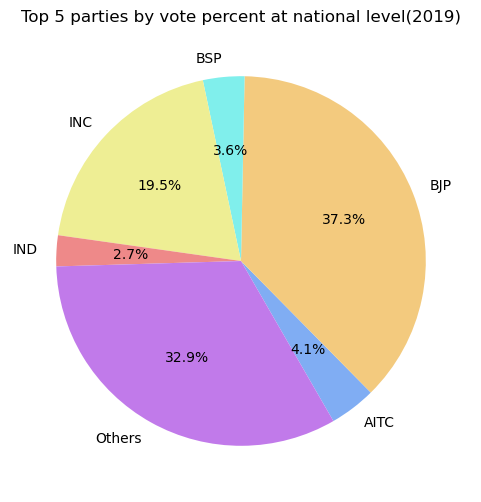

In [ ]:
color = ["#80adf3", "#f3ca7e", "#80efec",  "#eeee94",    "#ee8989" ,  "#c17aea"]
plt.figure(figsize=(6, 6))
plt.pie(split_nation_19['%_votes'], labels=split_nation_19.index, autopct='%1.1f%%', startangle=300, colors=color)

plt.title('Top 5 parties by vote percent at national level(2019)')
plt.show()

Que 7 - split % of votes of parties at state level 

In [36]:
split_2014_state = df1.groupby(['state','party']).agg({
    "total_votes":"sum"
})
split_2014_state

total_votes
state                     party               
Andaman & Nicobar Islands AAAP            3737
                          AIFB             225
                          AITC            2283
                          BJP            90969
                          BSP             1139
...                                        ...
West Bengal               SUCI          350616
                          SWJP            5340
                          TRMRPPI         1071
                          WPOI           48006
                          grac            2906

[1035 rows x 1 columns]

In [37]:
split_2014_state['total_state_votes'] = split_2014_state.groupby('state')['total_votes'].transform('sum')
split_2014_state
state_wise = split_2014_state.copy()

In [38]:
split_2014_state["percent_vote"] = (split_2014_state["total_votes"]/split_2014_state["total_state_votes"])*100
split_2014_state

total_votes  total_state_votes  \
state                     party                                     
Andaman & Nicobar Islands AAAP            3737             190328   
                          AIFB             225             190328   
                          AITC            2283             190328   
                          BJP            90969             190328   
                          BSP             1139             190328   
...                                        ...                ...   
West Bengal               SUCI          350616           51631828   
                          SWJP            5340           51631828   
                          TRMRPPI         1071           51631828   
                          WPOI           48006           51631828   
                          grac            2906           51631828   

                                   percent_vote  
state                     party                  
Andaman & Nicobar Islands AAAP         1.963453  
                          AIFB         0.118217  
                          AITC         1.199508  
                          BJP         47.795910  
                          BSP          0.598441  
...                                         ...  
West Bengal               SUCI         0.679070  
                          SWJP         0.010342  
                          TRMRPPI      0.002074  
                          WPOI         0.092978  
                          grac         0.005628  

[1035 rows x 3 columns]

In [39]:
split_2014_state.drop(columns=["total_votes","total_state_votes"],axis=1,inplace=True)
split_2014_state

percent_vote
state                     party                
Andaman & Nicobar Islands AAAP         1.963453
                          AIFB         0.118217
                          AITC         1.199508
                          BJP         47.795910
                          BSP          0.598441
...                                         ...
West Bengal               SUCI         0.679070
                          SWJP         0.010342
                          TRMRPPI      0.002074
                          WPOI         0.092978
                          grac         0.005628

[1035 rows x 1 columns]

In [40]:
split_2014_state = split_2014_state.sort_values(by =["state","percent_vote"],ascending=[True,False])
top_parties_state = split_2014_state.groupby('state').head(1)
top_parties_state

,,percent_vote
state,party,
Andaman & Nicobar Islands,BJP,47.795910
Andhra Pradesh,TDP,29.150403
Arunachal Pradesh,BJP,46.124673
Assam,BJP,36.505334
Bihar,BJP,29.379762
Chandigarh,BJP,42.200880
Dadra & Nagar Haveli,BJP,48.878913
Daman & Diu,BJP,53.832838
Goa,BJP,53.449082


In [130]:
BJP_14 = top_parties_state[top_parties_state["party"]=="BJP"]
BJP_14 = BJP_14.reset_index(drop=True)
BJP_14

,level_0,index,state,party,percent_vote
0,0,19,Andaman & Nicobar Islands,BJP,47.795910
1,2,17,Arunachal Pradesh,BJP,46.124673
2,3,8,Assam,BJP,36.505334
3,4,2,Bihar,BJP,29.379762
4,5,13,Chandigarh,BJP,42.200880
5,6,21,Dadra & Nagar Haveli,BJP,48.878913
6,7,26,Daman & Diu,BJP,53.832838
7,8,25,Goa,BJP,53.449082
8,9,30,Gujarat,BJP,59.050655
9,10,7,Haryana,BJP,34.740970


In [114]:
top_parties_state.columns

Index(['level_0', 'index', 'state', 'party', 'percent_vote'], dtype='object')

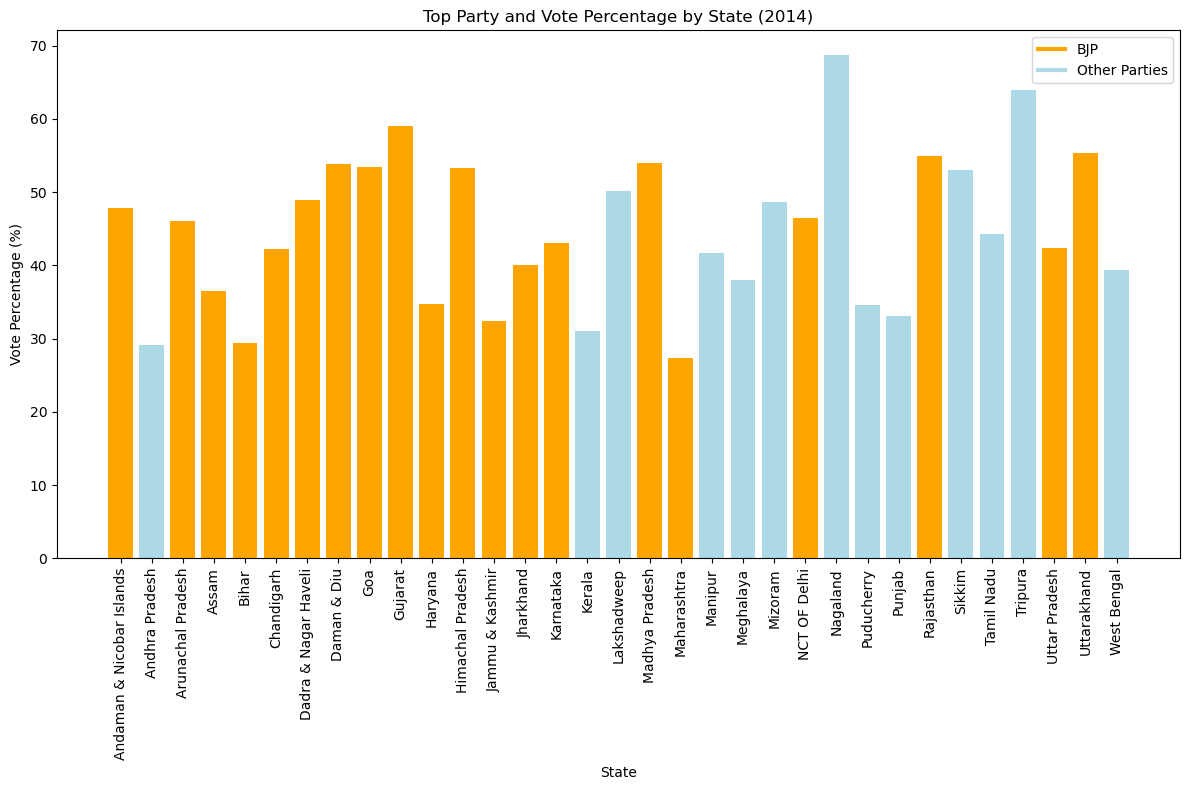

In [49]:

top_parties_state = top_parties_state.reset_index(drop=True)

top_parties_state = top_parties_state.sort_values(by='state')

colors = ['orange' if party == 'BJP' else 'lightblue' for party in top_parties_state['party']]

plt.figure(figsize=(12, 8))
bars = plt.bar(top_parties_state['state'], top_parties_state['percent_vote'], 
               color=colors)

plt.xlabel('State')
plt.ylabel('Vote Percentage (%)')
plt.title('Top Party and Vote Percentage by State (2014)')
plt.xticks(rotation=90)
plt.tight_layout()

orange_patch = plt.Line2D([0], [0], color='orange', linewidth=3, label='BJP')
blue_patch = plt.Line2D([0], [0], color='lightblue', linewidth=3, label='Other Parties')
plt.legend(handles=[orange_patch, blue_patch])

plt.show()


In [26]:
type(top_parties_state)

pandas.core.frame.DataFrame

In [29]:
top_parties_state.to_excel("top  parties 2014 state wise.xlsx")

In [115]:
split_2019_state = df2.groupby(['state','party']).agg({
    "total_votes":"sum"
})
split_2019_state

total_votes
state                     party               
Andaman & Nicobar Islands AAAP            2839
                          AINHCP           212
                          AITC            1721
                          BJP            93901
                          BSP             2486
...                                        ...
West Bengal               SUCI(C)       217376
                          SWJP            1899
                          UTSAP           2375
                          WPOI           23035
                          grac            2952

[1386 rows x 1 columns]

In [118]:
split_2019_state['total_state_votes'] = split_2019_state.groupby('state')['total_votes'].transform('sum')
split_2019_state

total_votes  total_state_votes  \
state                     party                                     
Andaman & Nicobar Islands AAAP            2839             207296   
                          AINHCP           212             207296   
                          AITC            1721             207296   
                          BJP            93901             207296   
                          BSP             2486             207296   
...                                        ...                ...   
West Bengal               SUCI(C)       217376           57206976   
                          SWJP            1899           57206976   
                          UTSAP           2375           57206976   
                          WPOI           23035           57206976   
                          grac            2952           57206976   

                                   percent_vote  
state                     party                  
Andaman & Nicobar Islands AAAP         1.369539  
                          AINHCP       0.102269  
                          AITC         0.830214  
                          BJP         45.298028  
                          BSP          1.199251  
...                                         ...  
West Bengal               SUCI(C)      0.379982  
                          SWJP         0.003320  
                          UTSAP        0.004152  
                          WPOI         0.040266  
                          grac         0.005160  

[1386 rows x 3 columns]

In [119]:
split_2019_state["percent_vote"] = (split_2019_state["total_votes"]/split_2019_state["total_state_votes"])*100
split_2019_state

total_votes  total_state_votes  \
state                     party                                     
Andaman & Nicobar Islands AAAP            2839             207296   
                          AINHCP           212             207296   
                          AITC            1721             207296   
                          BJP            93901             207296   
                          BSP             2486             207296   
...                                        ...                ...   
West Bengal               SUCI(C)       217376           57206976   
                          SWJP            1899           57206976   
                          UTSAP           2375           57206976   
                          WPOI           23035           57206976   
                          grac            2952           57206976   

                                   percent_vote  
state                     party                  
Andaman & Nicobar Islands AAAP         1.369539  
                          AINHCP       0.102269  
                          AITC         0.830214  
                          BJP         45.298028  
                          BSP          1.199251  
...                                         ...  
West Bengal               SUCI(C)      0.379982  
                          SWJP         0.003320  
                          UTSAP        0.004152  
                          WPOI         0.040266  
                          grac         0.005160  

[1386 rows x 3 columns]

In [121]:
split_2019_state.drop(columns=["total_votes","total_state_votes"],axis=1,inplace=True)
split_2019_state

percent_vote
state                     party                
Andaman & Nicobar Islands AAAP         1.369539
                          AINHCP       0.102269
                          AITC         0.830214
                          BJP         45.298028
                          BSP          1.199251
...                                         ...
West Bengal               SUCI(C)      0.379982
                          SWJP         0.003320
                          UTSAP        0.004152
                          WPOI         0.040266
                          grac         0.005160

[1386 rows x 1 columns]

In [122]:
split_2019_state = split_2019_state.sort_values(by =["state","percent_vote"],ascending=[True,False])
top_parties_state_19 = split_2019_state.groupby('state').head(1)
top_parties_state_19

,,percent_vote
state,party,
Andaman & Nicobar Islands,INC,45.976768
Andhra Pradesh,YSRCP,49.148246
Arunachal Pradesh,BJP,58.224849
Assam,BJP,36.053443
Bihar,BJP,23.573475
Chandigarh,BJP,50.636050
Chhattisgarh,BJP,50.699628
Dadra & Nagar Haveli,IND,48.978053
Daman & Diu,BJP,42.983228


In [125]:
top_parties_state_19 = top_parties_state_19.reset_index()
top_parties_state_19.columns

Index(['index', 'state', 'party', 'percent_vote'], dtype='object')

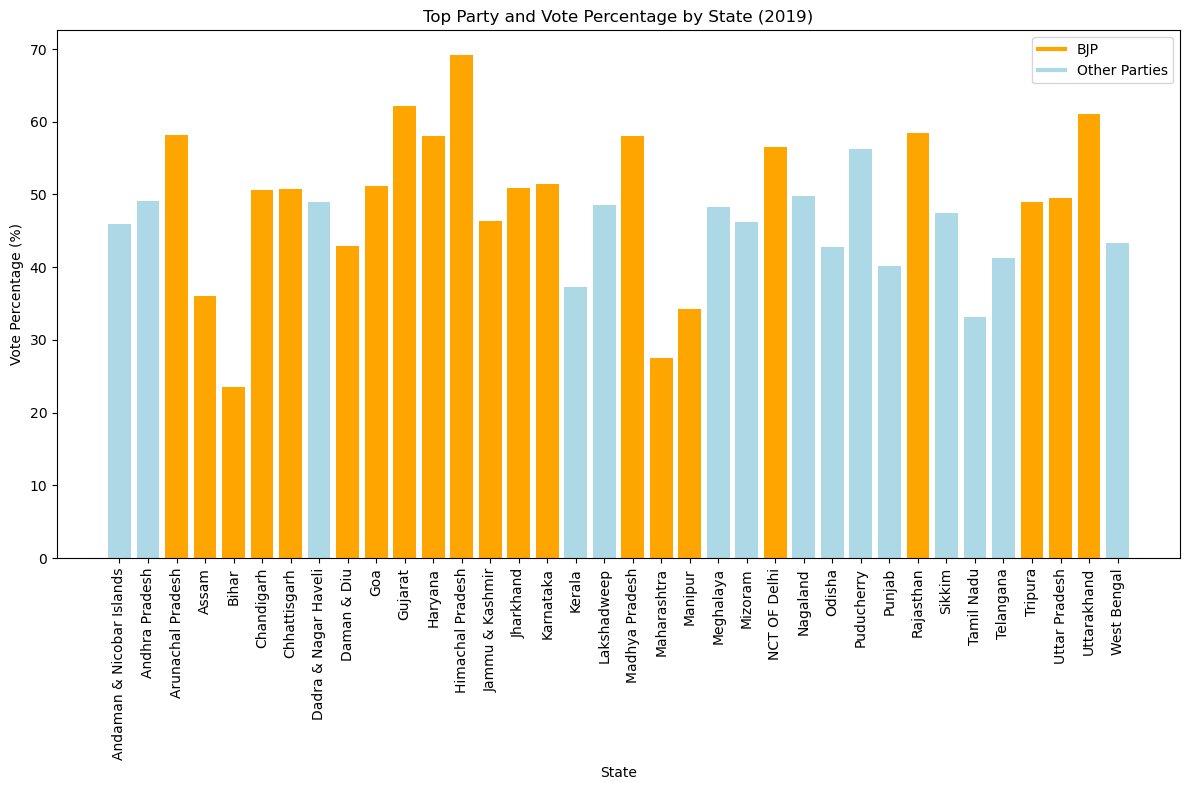

In [127]:
top_parties_state_19 = top_parties_state_19.sort_values(by='state')

colors = ['orange' if party == 'BJP' else 'lightblue' for party in top_parties_state_19['party']]

plt.figure(figsize=(12, 8))
bars = plt.bar(top_parties_state_19['state'], top_parties_state_19['percent_vote'], 
               color=colors)

plt.xlabel('State')
plt.ylabel('Vote Percentage (%)')
plt.title('Top Party and Vote Percentage by State (2019)')
plt.xticks(rotation=90)
plt.tight_layout()

orange_patch = plt.Line2D([0], [0], color='orange', linewidth=3, label='BJP')
blue_patch = plt.Line2D([0], [0], color='lightblue', linewidth=3, label='Other Parties')
plt.legend(handles=[orange_patch, blue_patch])

plt.show()

In [132]:
BJP_19 = top_parties_state_19[top_parties_state_19["party"]=="BJP"]
BJP_19 = BJP_19.reset_index(drop=True)
BJP_19

,index,state,party,percent_vote
0,2,Arunachal Pradesh,BJP,58.224849
1,3,Assam,BJP,36.053443
2,4,Bihar,BJP,23.573475
3,5,Chandigarh,BJP,50.636050
4,6,Chhattisgarh,BJP,50.699628
5,8,Daman & Diu,BJP,42.983228
6,9,Goa,BJP,51.177738
7,10,Gujarat,BJP,62.207886
8,11,Haryana,BJP,58.016213
9,12,Himachal Pradesh,BJP,69.111042


In [55]:
top_parties_state_19.to_excel("top  parties state wise 2019.xlsx")

Que 8

In [133]:
vote_share_14 = df1.groupby(['state','pc_name','party']).agg({
    "total_votes":"sum"
})
vote_share_14

total_votes
state                     pc_name                   party             
Andaman & Nicobar Islands Andaman & Nicobar Islands AAAP          3737
                                                    AIFB           225
                                                    AITC          2283
                                                    BJP          90969
                                                    BSP           1139
...                                                                ...
West Bengal               Uluberia                  INC          67826
                                                    IND          11903
                                                    IUC           6607
                                                    NOTA          8277
                                                    SUCI          2902

[5747 rows x 1 columns]

In [134]:
vote_share_14['total_state_votes'] = vote_share_14.groupby('pc_name')['total_votes'].transform('sum')
vote_share_14

total_votes  \
state                     pc_name                   party                
Andaman & Nicobar Islands Andaman & Nicobar Islands AAAP          3737   
                                                    AIFB           225   
                                                    AITC          2283   
                                                    BJP          90969   
                                                    BSP           1139   
...                                                                ...   
West Bengal               Uluberia                  INC          67826   
                                                    IND          11903   
                                                    IUC           6607   
                                                    NOTA          8277   
                                                    SUCI          2902   

                                                           total_state_votes  
state                     pc_name                   party                     
Andaman & Nicobar Islands Andaman & Nicobar Islands AAAP              190328  
                                                    AIFB              190328  
                                                    AITC              190328  
                                                    BJP               190328  
                                                    BSP               190328  
...                                                                      ...  
West Bengal               Uluberia                  INC              1186027  
                                                    IND              1186027  
                                                    IUC              1186027  
                                                    NOTA             1186027  
                                                    SUCI             1186027  

[5747 rows x 2 columns]

In [135]:
vote_share_14["percent_vote"] = (vote_share_14["total_votes"]/vote_share_14["total_state_votes"])*100
vote_share_14

total_votes  \
state                     pc_name                   party                
Andaman & Nicobar Islands Andaman & Nicobar Islands AAAP          3737   
                                                    AIFB           225   
                                                    AITC          2283   
                                                    BJP          90969   
                                                    BSP           1139   
...                                                                ...   
West Bengal               Uluberia                  INC          67826   
                                                    IND          11903   
                                                    IUC           6607   
                                                    NOTA          8277   
                                                    SUCI          2902   

                                                           total_state_votes  \
state                     pc_name                   party                      
Andaman & Nicobar Islands Andaman & Nicobar Islands AAAP              190328   
                                                    AIFB              190328   
                                                    AITC              190328   
                                                    BJP               190328   
                                                    BSP               190328   
...                                                                      ...   
West Bengal               Uluberia                  INC              1186027   
                                                    IND              1186027   
                                                    IUC              1186027   
                                                    NOTA             1186027   
                                                    SUCI             1186027   

                                                           percent_vote  
state                     pc_name                   party                
Andaman & Nicobar Islands Andaman & Nicobar Islands AAAP       1.963453  
                                                    AIFB       0.118217  
                                                    AITC       1.199508  
                                                    BJP       47.795910  
                                                    BSP        0.598441  
...                                                                 ...  
West Bengal               Uluberia                  INC        5.718757  
                                                    IND        1.003603  
                                                    IUC        0.557070  
                                                    NOTA       0.697876  
                                                    SUCI       0.244682  

[5747 rows x 3 columns]

In [136]:
threshold = 40

filtered_df_BJP_14 = vote_share_14.loc[vote_share_14.index.get_level_values('party').isin(['BJP']) & (vote_share_14['percent_vote'] < threshold)]

filtered_df_BJP_14 = filtered_df_BJP_14.reset_index()

filtered_df_BJP_14

,state,pc_name,party,total_votes,total_state_votes,percent_vote
0,Andhra Pradesh,Bhongir,BJP,183249,1211732,15.122898
1,Andhra Pradesh,Hyderabad,BJP,311414,971421,32.057573
2,Andhra Pradesh,Karimnagar,BJP,214828,1125184,19.092700
3,Andhra Pradesh,Mahbubnagar,BJP,272791,1014800,26.881257
4,Andhra Pradesh,Medak,BJP,181804,1191011,15.264678
...,...,...,...,...,...,...
156,West Bengal,Raiganj,BJP,203131,1108193,18.329930
157,West Bengal,Ranaghat,BJP,233670,1353196,17.268008
158,West Bengal,Srerampur,BJP,287712,1290433,22.295772
159,West Bengal,Tamluk,BJP,86265,1337684,6.448832


In [137]:
vote_share_19 = df2.groupby(['state','pc_name','party']).agg({
    "total_votes":"sum"
})
vote_share_19

total_votes
state                     pc_name                   party               
Andaman & Nicobar Islands Andaman & Nicobar Islands AAAP            2839
                                                    AINHCP           212
                                                    AITC            1721
                                                    BJP            93901
                                                    BSP             2486
...                                                                  ...
West Bengal               Uluberia                  IND            11732
                                                    IUC             2339
                                                    NOTA            9399
                                                    RaJSP           2519
                                                    SUCI(C)         1697

[5645 rows x 1 columns]

In [138]:
vote_share_19['total_state_votes'] = vote_share_19.groupby('pc_name')['total_votes'].transform('sum')
vote_share_19

total_votes  \
state                     pc_name                   party                  
Andaman & Nicobar Islands Andaman & Nicobar Islands AAAP            2839   
                                                    AINHCP           212   
                                                    AITC            1721   
                                                    BJP            93901   
                                                    BSP             2486   
...                                                                  ...   
West Bengal               Uluberia                  IND            11732   
                                                    IUC             2339   
                                                    NOTA            9399   
                                                    RaJSP           2519   
                                                    SUCI(C)         1697   

                                                             total_state_votes  
state                     pc_name                   party                       
Andaman & Nicobar Islands Andaman & Nicobar Islands AAAP                207296  
                                                    AINHCP              207296  
                                                    AITC                207296  
                                                    BJP                 207296  
                                                    BSP                 207296  
...                                                                        ...  
West Bengal               Uluberia                  IND                1311099  
                                                    IUC                1311099  
                                                    NOTA               1311099  
                                                    RaJSP              1311099  
                                                    SUCI(C)            1311099  

[5645 rows x 2 columns]

In [139]:
vote_share_19["percent_vote"] = (vote_share_19["total_votes"]/vote_share_19["total_state_votes"])*100
vote_share_19

total_votes  \
state                     pc_name                   party                  
Andaman & Nicobar Islands Andaman & Nicobar Islands AAAP            2839   
                                                    AINHCP           212   
                                                    AITC            1721   
                                                    BJP            93901   
                                                    BSP             2486   
...                                                                  ...   
West Bengal               Uluberia                  IND            11732   
                                                    IUC             2339   
                                                    NOTA            9399   
                                                    RaJSP           2519   
                                                    SUCI(C)         1697   

                                                             total_state_votes  \
state                     pc_name                   party                        
Andaman & Nicobar Islands Andaman & Nicobar Islands AAAP                207296   
                                                    AINHCP              207296   
                                                    AITC                207296   
                                                    BJP                 207296   
                                                    BSP                 207296   
...                                                                        ...   
West Bengal               Uluberia                  IND                1311099   
                                                    IUC                1311099   
                                                    NOTA               1311099   
                                                    RaJSP              1311099   
                                                    SUCI(C)            1311099   

                                                             percent_vote  
state                     pc_name                   party                  
Andaman & Nicobar Islands Andaman & Nicobar Islands AAAP         1.369539  
                                                    AINHCP       0.102269  
                                                    AITC         0.830214  
                                                    BJP         45.298028  
                                                    BSP          1.199251  
...                                                                   ...  
West Bengal               Uluberia                  IND          0.894822  
                                                    IUC          0.178400  
                                                    NOTA         0.716880  
                                                    RaJSP        0.192129  
                                                    SUCI(C)      0.129433  

[5645 rows x 3 columns]

In [140]:
threshold = 50

filtered_df_BJP_19 = vote_share_19.loc[vote_share_19.index.get_level_values('party').isin(['BJP']) & (vote_share_19['percent_vote'] >threshold)]

filtered_df_BJP_19 = filtered_df_BJP_19.reset_index()

filtered_df_BJP_19

,state,pc_name,party,total_votes,total_state_votes,percent_vote
0,Arunachal Pradesh,ARUNACHAL EAST,BJP,153883,293781,52.380174
1,Arunachal Pradesh,ARUNACHAL WEST,BJP,225796,358310,63.016941
2,Assam,Autonomous District,BJP,381316,617735,61.728087
3,Assam,Dibrugarh,BJP,659583,1015748,64.935693
4,Assam,Gauhati,BJP,1008936,1763757,57.203798
...,...,...,...,...,...,...
215,West Bengal,Alipurduars,BJP,750804,1380217,54.397533
216,West Bengal,Asansol,BJP,633378,1238135,51.155811
217,West Bengal,Darjeeling,BJP,750067,1267270,59.187624
218,West Bengal,Jalpaiguri,BJP,760145,1500922,50.645203


In [141]:
sorted_BJP_19 = filtered_df_BJP_19.sort_values(by ="percent_vote",ascending=False)
sorted_BJP_19.head(20)

,state,pc_name,party,total_votes,total_state_votes,percent_vote
52,Gujarat,Surat,BJP,795651,1068412,74.470429
46,Gujarat,Navsari,BJP,972739,1308018,74.367402
54,Gujarat,Vadodara,BJP,883719,1222348,72.296842
65,Himachal Pradesh,Kangra,BJP,725218,1006989,72.018463
152,Rajasthan,Bhilwara,BJP,938160,1310513,71.587233
133,Maharashtra,Mumbai North,BJP,706678,989759,71.398997
61,Haryana,Karnal,BJP,911594,1300722,70.083692
40,Gujarat,Gandhinagar,BJP,894624,1284090,69.669883
167,Rajasthan,Rajsamand,BJP,863039,1239845,69.608620
109,Madhya Pradesh,HOSHANGABAD,BJP,877927,1265869,69.353701


In [142]:
gained_vote_BJP = []


pc_names_14 = filtered_df_BJP_14["pc_name"].tolist()
pc_names_19 = filtered_df_BJP_19["pc_name"].tolist()


for i in pc_names_14:
    if i in pc_names_19:
        gained_vote_BJP.append(i)


print(gained_vote_BJP)


['Autonomous District', 'Silchar', 'Araria', 'Begusarai', 'Darbhanga', 'Ujiarpur', 'Bhiwani-Mahendragarh', 'Kurukshetra', 'Sonipat', 'Godda', 'Kodarma', 'Chikkballapur', 'Chitradurga', 'Kolar', 'Dausa', 'Tripura West', 'Allahabad', 'Hardoi', 'Kheri', 'Kushi Nagar', 'Alipurduars', 'Asansol', 'Jalpaiguri', 'Ranaghat']


list of top 5 constituencies where bjp has less than 40 % share in 2014 and got more than 50 % share in 2019

In [143]:
l1 = sorted_BJP_19["pc_name"].head(130).tolist()
gain_BJP =[]
for i in gained_vote_BJP:
    if i in l1:
        gain_BJP.append(i)
gain_BJP        
        


['Autonomous District',
 'Darbhanga',
 'Bhiwani-Mahendragarh',
 'Kodarma',
 'Kushi Nagar']

In [144]:
gained_rows = []

for i in gain_BJP:
    gain = sorted_BJP_19[sorted_BJP_19['pc_name'] == i]
    gained_rows.append(gain)

gained_votes_df = pd.concat(gained_rows)

gained_votes_df = gained_votes_df.sort_values(by="percent_vote",ascending=False)
gained_votes_df.head()

,state,pc_name,party,total_votes,total_state_votes,percent_vote
57,Haryana,Bhiwani-Mahendragarh,BJP,736699,1161115,63.447548
75,Jharkhand,Kodarma,BJP,753016,1209541,62.256344
2,Assam,Autonomous District,BJP,381316,617735,61.728087
12,Bihar,Darbhanga,BJP,586668,964996,60.794863
200,Uttar Pradesh,Kushi Nagar,BJP,597039,1053117,56.692561


In [ ]:
gained_votes_df.head().to_excel("BJP_gain.xlsx",index=False)

In [145]:
threshold = 40

filtered_df_INC_14 = vote_share_14.loc[vote_share_14.index.get_level_values('party').isin(['INC']) & (vote_share_14['percent_vote'] < threshold)]

filtered_df_INC_14 = filtered_df_INC_14.reset_index()

filtered_df_INC_14

,state,pc_name,party,total_votes,total_state_votes,percent_vote
0,Andhra Pradesh,Adilabad,INC,259557,1045839,24.818065
1,Andhra Pradesh,Amalapuram,INC,12182,1120927,1.086779
2,Andhra Pradesh,Anakapalli,INC,17770,1148072,1.547812
3,Andhra Pradesh,Anantapur,INC,16719,1212145,1.379290
4,Andhra Pradesh,Aruku,INC,52884,909614,5.813895
...,...,...,...,...,...,...
360,West Bengal,Raiganj,INC,315881,1108193,28.504150
361,West Bengal,Ranaghat,INC,92218,1353196,6.814829
362,West Bengal,Srerampur,INC,86099,1290433,6.672102
363,West Bengal,Tamluk,INC,29645,1337684,2.216144


In [146]:
threshold = 50

filtered_df_INC_19 = vote_share_19.loc[vote_share_19.index.get_level_values('party').isin(['INC']) & (vote_share_19['percent_vote'] >threshold)]

filtered_df_INC_19 = filtered_df_INC_19.reset_index()

filtered_df_INC_19

,state,pc_name,party,total_votes,total_state_votes,percent_vote
0,Assam,Kaliabor,INC,786092,1424687,55.176470
1,Karnataka,Bangalore Rural,INC,878258,1621906,54.149747
2,Kerala,Alathur,INC,533815,1018743,52.399378
3,Kerala,Ernakulam,INC,491263,967203,50.792129
4,Kerala,Idukki,INC,498493,919297,54.225457
5,Kerala,Kannur,INC,529741,1053842,50.267592
6,Kerala,Wayanad,INC,706367,1092197,64.673955
7,Meghalaya,Shillong,INC,419689,784190,53.518790
8,Puducherry,Puducherry,INC,444981,790760,56.272573
9,Punjab,Amritsar,INC,445032,859513,51.777227


In [147]:
sorted_INC_19 = filtered_df_INC_19.sort_values(by ="percent_vote",ascending=False)
sorted_INC_19.head(20)

,state,pc_name,party,total_votes,total_state_votes,percent_vote
6,Kerala,Wayanad,INC,706367,1092197,64.673955
12,Tamil Nadu,Karur,INC,695697,1103165,63.063730
11,Tamil Nadu,Kanniyakumari,INC,627235,1048377,59.829145
16,Tamil Nadu,Tiruchirappalli,INC,621285,1048062,59.279413
8,Puducherry,Puducherry,INC,444981,790760,56.272573
17,Uttar Pradesh,Rae Bareli,INC,534918,958556,55.804564
0,Assam,Kaliabor,INC,786092,1424687,55.176470
15,Tamil Nadu,Thiruvallur,INC,767292,1408189,54.487856
4,Kerala,Idukki,INC,498493,919297,54.225457
1,Karnataka,Bangalore Rural,INC,878258,1621906,54.149747


In [148]:
gained_vote_INC = []


pc_names_14 = filtered_df_INC_14["pc_name"].tolist()
pc_names_19 = filtered_df_INC_19["pc_name"].tolist()


for i in pc_names_14:
    if i in pc_names_19:
        gained_vote_INC.append(i)


print(gained_vote_INC)


['Kaliabor', 'Shillong', 'Puducherry', 'Arani', 'Kanniyakumari', 'Karur', 'Krishnagiri', 'Sivaganga', 'Thiruvallur ', 'Tiruchirappalli']


list of top 5 constituencies where INC has less than 40 % share in 2014 and got more than 50 % share in 2019

In [150]:
gained_rows = []

for i in gained_vote_INC:
    gain = sorted_INC_19[sorted_INC_19['pc_name'] == i]
    gained_rows.append(gain)

gained_votes_df_INC = pd.concat(gained_rows)

gained_votes_df_INC = gained_votes_df_INC.sort_values(by="percent_vote",ascending=False)
gained_votes_df_INC.head()

,state,pc_name,party,total_votes,total_state_votes,percent_vote
12,Tamil Nadu,Karur,INC,695697,1103165,63.063730
11,Tamil Nadu,Kanniyakumari,INC,627235,1048377,59.829145
16,Tamil Nadu,Tiruchirappalli,INC,621285,1048062,59.279413
8,Puducherry,Puducherry,INC,444981,790760,56.272573
0,Assam,Kaliabor,INC,786092,1424687,55.176470


In [151]:
gained_votes_df_INC.head().to_excel("INC_gain.xlsx",index =False)

que 9

In [ ]:
threshold = 40

loss_df_BJP_14 = vote_share_14.loc[vote_share_14.index.get_level_values('party').isin(['BJP']) & (vote_share_14['percent_vote'] > threshold)]

loss_df_BJP_14 = loss_df_BJP_14.reset_index()

loss_df_BJP_14

,state,pc_name,party,total_votes,total_state_votes,percent_vote
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BJP,90969,190328,47.795910
1,Andhra Pradesh,Narsapuram,BJP,540306,1088947,49.617291
2,Andhra Pradesh,Secundrabad,BJP,438271,1003769,43.662536
3,Andhra Pradesh,Tirupati,BJP,542951,1213062,44.758718
4,Andhra Pradesh,Visakhapatnam,BJP,566832,1163558,48.715406
...,...,...,...,...,...,...
230,Uttarakhand,Garhwal,BJP,405690,682024,59.483244
231,Uttarakhand,Hardwar,BJP,592320,1175692,50.380542
232,Uttarakhand,Nainital-udhamsingh Nagar,BJP,636769,1101435,57.812672
233,Uttarakhand,Tehri Garhwal,BJP,446733,776214,57.552814


In [ ]:
threshold = 30

loss_df_BJP_19 = vote_share_19.loc[vote_share_19.index.get_level_values('party').isin(['BJP']) & (vote_share_19['percent_vote'] <threshold)]

loss_df_BJP_19 = loss_df_BJP_19.reset_index()

loss_df_BJP_19

,state,pc_name,party,total_votes,total_state_votes,percent_vote
0,Andhra Pradesh,Amalapuram,BJP,11534,1232895,0.935522
1,Andhra Pradesh,Anakapalli,BJP,13276,1238491,1.071950
2,Andhra Pradesh,Anantapur,BJP,7604,1342306,0.566488
3,Andhra Pradesh,Aruku,BJP,17867,1074538,1.662761
4,Andhra Pradesh,Bapatla,BJP,10351,1266492,0.817297
...,...,...,...,...,...,...
65,Uttar Pradesh,Hamirpur,BJP,575122,2078543,27.669478
66,West Bengal,Baharampur,BJP,143038,1299997,11.002948
67,West Bengal,Jadavpur,BJP,393233,1436894,27.366876
68,West Bengal,Jangipur,BJP,317056,1304504,24.304717


In [ ]:
loss_BJP = []


pc_names_14 = loss_df_BJP_14["pc_name"].tolist()
pc_names_19 = loss_df_BJP_19["pc_name"].tolist()


for i in pc_names_14:
    if i in pc_names_19:
        loss_BJP.append(i)


print(loss_BJP)


['Narsapuram', 'Tirupati ', 'Visakhapatnam']


In [ ]:
sorted_loss_BJP =  loss_df_BJP_19.sort_values(by ="percent_vote",ascending=False)

top constituencies where BJP lost vote share 

In [ ]:
lost_rows = []

for i in loss_BJP:
    loss = sorted_loss_BJP[sorted_loss_BJP['pc_name'] == i]
    lost_rows.append(loss)

lost_vote_BJP = pd.concat(lost_rows)

lost_vote_BJP = lost_vote_BJP.sort_values(by="percent_vote",ascending=False)
lost_vote_BJP

,state,pc_name,party,total_votes,total_state_votes,percent_vote
22,Andhra Pradesh,Visakhapatnam,BJP,33892,1239754,2.733768
20,Andhra Pradesh,Tirupati,BJP,16125,1313515,1.227622
15,Andhra Pradesh,Narsapuram,BJP,12414,1177738,1.054054


In [ ]:
lost_vote_BJP.to_excel("lost_BJP.xlsx",index=False)

In [ ]:
threshold = 40

loss_df_INC_14 = vote_share_14.loc[vote_share_14.index.get_level_values('party').isin(['INC']) & (vote_share_14['percent_vote'] > threshold)]

loss_df_INC_14 = loss_df_INC_14.reset_index()

loss_df_INC_14

,state,pc_name,party,total_votes,total_state_votes,percent_vote
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,INC,83157,190328,43.691417
1,Arunachal Pradesh,ARUNACHAL EAST,INC,118455,261291,45.334512
2,Assam,Silchar,INC,336451,799830,42.065314
3,Bihar,Kishanganj,INC,493461,928490,53.146614
4,Dadra & Nagar Haveli,Dadar & Nagar Haveli,INC,74576,165286,45.119369
...,...,...,...,...,...,...
62,Rajasthan,Banswara,INC,485517,1171188,41.455087
63,Rajasthan,KARAULI-DHOLPUR,INC,375191,845941,44.351911
64,Uttar Pradesh,Amethi,INC,408651,874625,46.722996
65,Uttar Pradesh,Rae Bareli,INC,526434,825136,63.799665


In [ ]:
threshold = 30

loss_df_INC_19 = vote_share_19.loc[vote_share_19.index.get_level_values('party').isin(['INC']) & (vote_share_19['percent_vote'] <threshold)]

loss_df_INC_19 = loss_df_INC_19.reset_index()

loss_df_INC_19

,state,pc_name,party,total_votes,total_state_votes,percent_vote
0,Andhra Pradesh,Amalapuram,INC,7887,1232895,0.639714
1,Andhra Pradesh,Anakapalli,INC,10121,1238491,0.817204
2,Andhra Pradesh,Anantapur,INC,30079,1342306,2.240845
3,Andhra Pradesh,Aruku,INC,17730,1074538,1.650011
4,Andhra Pradesh,Bapatla,INC,13155,1266492,1.038696
...,...,...,...,...,...,...
211,West Bengal,Raiganj,INC,83662,1277109,6.550890
212,West Bengal,Ranaghat,INC,23297,1484035,1.569842
213,West Bengal,Srerampur,INC,32509,1401705,2.319247
214,West Bengal,Tamluk,INC,16001,1446499,1.106188


In [ ]:
loss_INC = []


pc_names_14 = loss_df_INC_14["pc_name"].tolist()
pc_names_19 = loss_df_INC_19["pc_name"].tolist()


for i in pc_names_14:
    if i in pc_names_19:
        loss_INC.append(i)


print(loss_INC)


['ARUNACHAL EAST', 'Mandi', 'Hingoli ', 'Banswara']


In [ ]:
sorted_loss_INC =  loss_df_INC_19.sort_values(by ="percent_vote",ascending=False)
sorted_loss_INC

,state,pc_name,party,total_votes,total_state_votes,percent_vote
101,Rajasthan,Udaipur,INC,433634,1454518,29.812900
69,Maharashtra,Pune,INC,308207,1035236,29.771666
32,Bihar,Supaul,INC,330524,1110805,29.755358
73,NCT OF Delhi,CHANDNI CHOWK,INC,290910,980390,29.672885
63,Madhya Pradesh,TIKAMGARH,INC,324189,1096712,29.560085
...,...,...,...,...,...,...
14,Andhra Pradesh,Narasaraopet,INC,11033,1437420,0.767556
10,Andhra Pradesh,Kakinada,INC,8640,1234655,0.699791
9,Andhra Pradesh,Kadapa,INC,8341,1228242,0.679101
0,Andhra Pradesh,Amalapuram,INC,7887,1232895,0.639714


In [ ]:
lost_rows = []

for i in loss_INC:
    loss = sorted_loss_INC[sorted_loss_INC['pc_name'] == i]
    lost_rows.append(loss)

lost_vote_INC = pd.concat(lost_rows)

lost_vote_INC = lost_vote_INC.sort_values(by="percent_vote",ascending=False)
lost_vote_INC

,state,pc_name,party,total_votes,total_state_votes,percent_vote
25,Arunachal Pradesh,ARUNACHAL EAST,INC,83935,293781,28.570602
97,Rajasthan,Banswara,INC,406245,1439671,28.217905
67,Maharashtra,Hingoli,INC,308456,1157516,26.648098
51,Himachal Pradesh,Mandi,INC,241730,941371,25.678505


In [ ]:
lost_vote_INC.head(3).to_excel("lost_INC.xlsx",index=False)

que 10 - Nota Analysis

In [157]:
split_2014_national

,total_votes,%_votes
party,,
A S P,557,0.000107
AAAP,11036817,2.122389
AAMJP,9371,0.001802
AAP,4380,0.000842
ABAS,296,0.000057
...,...,...
ravp,38992,0.007498
rdsc,10800,0.002077
shsap,2982,0.000573


In [158]:
nota_14 = split_2014_national.loc["NOTA"]

print(nota_14)

total_votes    5.445287e+06
%_votes        1.047133e+00
Name: NOTA, dtype: float64


In [159]:
nota_19 = split_2019_national.loc["NOTA"]
print(nota_19)

total_votes    6.522772e+06
%_votes        1.062042e+00
Name: NOTA, dtype: float64


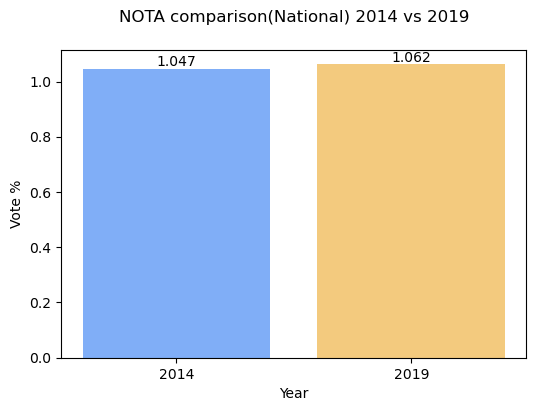

In [ ]:
year = ['2014', '2019']
values = [nota_14["%_votes"], nota_19["%_votes"]]
plt.figure(figsize=(6,4))
plt.xlabel("Year")
plt.bar(year, values,color =  ["#80aef7", "#f3ca7e"])
plt.ylabel('Vote %')
plt.title('NOTA comparison(National) 2014 vs 2019',pad =20)
for i, value in enumerate(values):
    plt.text(i, value + 0.01, f'{value:.3f}', ha='center')
plt.show()

In [160]:
nota_14_con = vote_share_14.loc[vote_share_14.index.get_level_values('party').isin(['NOTA'])]

nota_14_con = nota_14_con.reset_index()

nota_14_con

,state,pc_name,party,total_votes,total_state_votes,percent_vote
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,NOTA,1564,190328,0.821739
1,Andhra Pradesh,Adilabad,NOTA,17084,1045839,1.633521
2,Andhra Pradesh,Amalapuram,NOTA,6141,1120927,0.547850
3,Andhra Pradesh,Anakapalli,NOTA,8604,1148072,0.749430
4,Andhra Pradesh,Anantapur,NOTA,8857,1212145,0.730688
...,...,...,...,...,...,...
506,West Bengal,Raiganj,NOTA,10929,1108193,0.986200
507,West Bengal,Ranaghat,NOTA,14626,1353196,1.080849
508,West Bengal,Srerampur,NOTA,15374,1290433,1.191383
509,West Bengal,Tamluk,NOTA,11643,1337684,0.870385


In [161]:
nota_14_top = nota_14_con.sort_values(by="percent_vote",ascending=False)
nota_14_top

,state,pc_name,party,total_votes,total_state_votes,percent_vote
363,Tamil Nadu,Nilgiris,NOTA,46559,933076,4.989840
293,Meghalaya,Tura,NOTA,19185,458071,4.188215
113,Gujarat,Dahod,NOTA,32305,900381,3.587926
163,Jharkhand,Singhbhum,NOTA,27037,795286,3.399657
89,Bihar,Samastipur (SC),NOTA,29211,863199,3.384040
...,...,...,...,...,...,...
463,Uttar Pradesh,Varanasi,NOTA,2051,1030685,0.198994
131,Haryana,Bhiwani-Mahendragarh,NOTA,1994,1030431,0.193511
247,Maharashtra,Beed,NOTA,2323,1232200,0.188525
440,Uttar Pradesh,Mathura,NOTA,1953,1076868,0.181359


In [162]:
nota_14_top.head().to_excel("nota_top_14.xlsx",index=False)

In [163]:
nota_19_con = vote_share_19.loc[vote_share_19.index.get_level_values('party').isin(['NOTA'])]

nota_19_con = nota_19_con.reset_index()

nota_19_con

,state,pc_name,party,total_votes,total_state_votes,percent_vote
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,NOTA,1412,207296,0.681152
1,Andhra Pradesh,Amalapuram,NOTA,16468,1232895,1.335718
2,Andhra Pradesh,Anakapalli,NOTA,34897,1238491,2.817703
3,Andhra Pradesh,Anantapur,NOTA,16466,1342306,1.226695
4,Andhra Pradesh,Aruku,NOTA,47977,1074538,4.464896
...,...,...,...,...,...,...
538,West Bengal,Raiganj,NOTA,13749,1277109,1.076572
539,West Bengal,Ranaghat,NOTA,9137,1484035,0.615686
540,West Bengal,Srerampur,NOTA,20501,1401705,1.462576
541,West Bengal,Tamluk,NOTA,10533,1446499,0.728172


In [164]:
nota_19_top = nota_19_con.sort_values(by="percent_vote",ascending=False)
nota_19_top

,state,pc_name,party,total_votes,total_state_votes,percent_vote
51,Bihar,Gopalganj (SC),NOTA,51660,1024876,5.040610
83,Chhattisgarh,BASTAR,NOTA,41667,912846,4.564516
67,Bihar,Paschim Champaran,NOTA,45699,1012936,4.511539
4,Andhra Pradesh,Aruku,NOTA,47977,1074538,4.464896
54,Bihar,Jamui (SC),NOTA,39496,949137,4.161254
...,...,...,...,...,...,...
241,Maharashtra,Beed,NOTA,2500,1352399,0.184857
225,Madhya Pradesh,MORENA,NOTA,2098,1137290,0.184474
140,Jammu & Kashmir,Jammu,NOTA,2618,1478795,0.177036
125,Haryana,Bhiwani-Mahendragarh,NOTA,2041,1161115,0.175779


In [165]:
nota_19_top.head().to_excel("nota_19.xlsx",index=False)

In [166]:
state_wise

total_votes  total_state_votes
state                     party                                  
Andaman & Nicobar Islands AAAP            3737             190328
                          AIFB             225             190328
                          AITC            2283             190328
                          BJP            90969             190328
                          BSP             1139             190328
...                                        ...                ...
West Bengal               SUCI          350616           51631828
                          SWJP            5340           51631828
                          TRMRPPI         1071           51631828
                          WPOI           48006           51631828
                          grac            2906           51631828

[1035 rows x 2 columns]

NOTA analysis state wise 

In [174]:
nota_14_state = state_wise.loc[state_wise.index.get_level_values('party').isin(['NOTA'])]

nota_14_state = nota_14_state.reset_index()

nota_14_state

,state,party,total_votes,total_state_votes
0,Andaman & Nicobar Islands,NOTA,1564,190328
1,Andhra Pradesh,NOTA,340554,48367188
2,Arunachal Pradesh,NOTA,6321,596956
3,Assam,NOTA,147057,15085883
4,Bihar,NOTA,580964,35885332
5,Chandigarh,NOTA,3106,453455
6,Dadra & Nagar Haveli,NOTA,2962,165286
7,Daman & Diu,NOTA,1316,87233
8,Goa,NOTA,10103,817000
9,Gujarat,NOTA,454885,25824003


In [175]:
nota_14_state["nota %"] = (nota_14_state["total_votes"]/nota_14_state["total_state_votes"])*100
nota_14_state

,state,party,total_votes,total_state_votes,nota %
0,Andaman & Nicobar Islands,NOTA,1564,190328,0.821739
1,Andhra Pradesh,NOTA,340554,48367188,0.704101
2,Arunachal Pradesh,NOTA,6321,596956,1.058872
3,Assam,NOTA,147057,15085883,0.974799
4,Bihar,NOTA,580964,35885332,1.618946
5,Chandigarh,NOTA,3106,453455,0.684963
6,Dadra & Nagar Haveli,NOTA,2962,165286,1.792045
7,Daman & Diu,NOTA,1316,87233,1.508603
8,Goa,NOTA,10103,817000,1.236597
9,Gujarat,NOTA,454885,25824003,1.761481


In [176]:
nota_14_state = nota_14_state.sort_values(by="nota %",ascending=False)
nota_14_state

,state,party,total_votes,total_state_votes,nota %
24,Puducherry,NOTA,22268,740017,3.009120
20,Meghalaya,NOTA,30145,1078058,2.796232
6,Dadra & Nagar Haveli,NOTA,2962,165286,1.792045
9,Gujarat,NOTA,454885,25824003,1.761481
4,Bihar,NOTA,580964,35885332,1.618946
7,Daman & Diu,NOTA,1316,87233,1.508603
21,Mizoram,NOTA,6495,433201,1.499304
13,Jharkhand,NOTA,190927,12982940,1.470599
28,Tamil Nadu,NOTA,581782,40607149,1.432708
27,Sikkim,NOTA,4332,308967,1.402091


In [178]:
nota_14_state.drop(columns =["total_votes","total_state_votes"],inplace=True)
nota_14_state

,state,party,nota %
24,Puducherry,NOTA,3.009120
20,Meghalaya,NOTA,2.796232
6,Dadra & Nagar Haveli,NOTA,1.792045
9,Gujarat,NOTA,1.761481
4,Bihar,NOTA,1.618946
7,Daman & Diu,NOTA,1.508603
21,Mizoram,NOTA,1.499304
13,Jharkhand,NOTA,1.470599
28,Tamil Nadu,NOTA,1.432708
27,Sikkim,NOTA,1.402091


In [171]:
nota_19_state = split_2019_state.loc[split_2019_state.index.get_level_values('party').isin(['NOTA'])]

nota_19_state = nota_19_state.reset_index()

nota_19_state

,state,party,percent_vote
0,Andaman & Nicobar Islands,NOTA,0.681152
1,Andhra Pradesh,NOTA,1.483026
2,Arunachal Pradesh,NOTA,1.144626
3,Assam,NOTA,0.991618
4,Bihar,NOTA,2.002002
5,Chandigarh,NOTA,0.949475
6,Chhattisgarh,NOTA,1.441593
7,Dadra & Nagar Haveli,NOTA,1.482539
8,Daman & Diu,NOTA,1.700031
9,Goa,NOTA,1.464950


In [179]:
nota_14_state.head().to_excel("nota_14_state.xlsx",index=False)

In [172]:
nota_19_state = nota_19_state.sort_values(by="percent_vote",ascending=False)
nota_19_state

,state,party,percent_vote
4,Bihar,NOTA,2.002002
8,Daman & Diu,NOTA,1.700031
26,Puducherry,NOTA,1.542693
1,Andhra Pradesh,NOTA,1.483026
7,Dadra & Nagar Haveli,NOTA,1.482539
9,Goa,NOTA,1.464950
6,Chhattisgarh,NOTA,1.441593
10,Gujarat,NOTA,1.378628
25,Odisha,NOTA,1.306306
30,Tamil Nadu,NOTA,1.268819


In [177]:
nota_19_state.head().to_excel("nota_19_state.xlsx",index=False)

 Que 11 - Secondary analysis 2019 elections 

In [390]:
postal = df2.copy()

In [391]:
postal.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Aruku,KISHORE CHANDRA DEO,MALE,72.0,ST,TDP,Bicycle,336163,1938,338101,1451418
1,Andhra Pradesh,Aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,MALE,54.0,ST,BJP,Lotus,17578,289,17867,1451418
2,Andhra Pradesh,Aruku,GODDETI. MADHAVI,FEMALE,26.0,ST,YSRCP,Ceiling Fan,557561,4629,562190,1451418
3,Andhra Pradesh,Aruku,SHRUTI DEVI VYRICHERLA,FEMALE,46.0,ST,INC,Hand,17656,74,17730,1451418
4,Andhra Pradesh,Aruku,GANGULAIAH VAMPURU.,MALE,49.0,ST,JnP,Glass Tumbler,42245,549,42794,1451418


In [392]:
postal["voter_turnout"] = (postal["total_votes"]/postal["total_electors"])*100
postal

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,voter_turnout
0,Andhra Pradesh,Aruku,KISHORE CHANDRA DEO,MALE,72.0,ST,TDP,Bicycle,336163,1938,338101,1451418,23.294530
1,Andhra Pradesh,Aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,MALE,54.0,ST,BJP,Lotus,17578,289,17867,1451418,1.231003
2,Andhra Pradesh,Aruku,GODDETI. MADHAVI,FEMALE,26.0,ST,YSRCP,Ceiling Fan,557561,4629,562190,1451418,38.733845
3,Andhra Pradesh,Aruku,SHRUTI DEVI VYRICHERLA,FEMALE,46.0,ST,INC,Hand,17656,74,17730,1451418,1.221564
4,Andhra Pradesh,Aruku,GANGULAIAH VAMPURU.,MALE,49.0,ST,JnP,Glass Tumbler,42245,549,42794,1451418,2.948427
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,Puducherry,Puducherry,TIRAVITAMANKAI@LOURDHUMARY,FEMALE,57.0,GENERAL,IND,Slate,870,0,870,973410,0.089377
8593,Puducherry,Puducherry,IMS. BALAJI,MALE,32.0,GENERAL,IND,Bat,2546,0,2546,973410,0.261555
8594,Puducherry,Puducherry,RAMESH.D,MALE,49.0,SC,IND,Mike,1653,0,1653,973410,0.169815
8595,Puducherry,Puducherry,V. RAMAMURTHI,MALE,74.0,GENERAL,IND,Whistle,641,1,642,973410,0.065954


In [393]:
correlation = postal["postal_votes"].corr(postal["voter_turnout"])
correlation

0.7256544148765584

yes postal votes and voter_turnout are higly correlated 

In [394]:
state_2019

,state,total_votes,total_electors
0,Andaman & Nicobar Islands,207296,318471
1,Andhra Pradesh,31612534,39405967
2,Arunachal Pradesh,652091,803563
3,Assam,17986066,22050059
4,Bihar,40806661,71216290
5,Chandigarh,456568,646729
6,Chhattisgarh,13614453,19016462
7,Dadra & Nagar Haveli,198983,250029
8,Daman & Diu,87469,121740
9,Goa,853203,1136113


In [395]:
voter_state = state_2019.sort_values(by="state",ascending=True)
voter_state

,state,total_votes,total_electors
0,Andaman & Nicobar Islands,207296,318471
1,Andhra Pradesh,31612534,39405967
2,Arunachal Pradesh,652091,803563
3,Assam,17986066,22050059
4,Bihar,40806661,71216290
5,Chandigarh,456568,646729
6,Chhattisgarh,13614453,19016462
7,Dadra & Nagar Haveli,198983,250029
8,Daman & Diu,87469,121740
9,Goa,853203,1136113


In [396]:
literacy = pd.read_excel("6T_15112023078654FD8A3F4938AE67231CB8148F96.XLSX",skiprows=2)
literacy

,Unnamed: 0,(Per cent),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,State/Union Territory,1951,1961,1971,1981,1991,2001.00,2011.00
1,NaN,Andaman & Nicobar Islands,30.3,40.07,51.15,63.19,73.02,81.30,86.63
2,NaN,Andhra Pradesh,-,21.19,24.57,35.66,44.08,60.47,67.02
3,NaN,Arunachal Pradesh,-,7.13,11.29,25.55,41.59,54.34,65.39
4,NaN,Assam,18.53,32.95,33.94,-,52.89,63.25,72.19
5,NaN,Bihar,13.49,21.95,23.17,32.32,37.49,47.00,61.80
6,NaN,Chandigarh,-,-,70.43,74.8,77.81,81.94,86.05
7,NaN,Chhattisgarh,9.41,18.14,24.08,32.63,42.91,64.66,70.28
8,NaN,Dadra & Nagar Haveli,-,-,18.13,32.9,40.71,57.63,76.24
9,NaN,Daman & Diu,-,-,-,-,71.2,78.18,87.10


In [397]:
new_header = literacy.iloc[0]

In [398]:
literacy = literacy[1:]
literacy

,Unnamed: 0,(Per cent),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,NaN,Andaman & Nicobar Islands,30.3,40.07,51.15,63.19,73.02,81.30,86.63
2,NaN,Andhra Pradesh,-,21.19,24.57,35.66,44.08,60.47,67.02
3,NaN,Arunachal Pradesh,-,7.13,11.29,25.55,41.59,54.34,65.39
4,NaN,Assam,18.53,32.95,33.94,-,52.89,63.25,72.19
5,NaN,Bihar,13.49,21.95,23.17,32.32,37.49,47.00,61.80
6,NaN,Chandigarh,-,-,70.43,74.8,77.81,81.94,86.05
7,NaN,Chhattisgarh,9.41,18.14,24.08,32.63,42.91,64.66,70.28
8,NaN,Dadra & Nagar Haveli,-,-,18.13,32.9,40.71,57.63,76.24
9,NaN,Daman & Diu,-,-,-,-,71.2,78.18,87.10
10,NaN,Delhi,-,61.95,65.08,71.94,75.29,81.67,86.21


In [399]:
literacy = literacy.iloc[:35]

In [400]:
literacy.columns = new_header

In [401]:
literacy.loc[literacy['State/Union Territory'] == 'Delhi', 'State/Union Territory'] = 'NCT OF Delhi'


In [402]:
literacy = literacy.sort_values(by ="State/Union Territory",ascending=True)
literacy

,NaN,State/Union Territory,1951,1961,1971,1981,1991,2001.0,2011.0
1,NaN,Andaman & Nicobar Islands,30.3,40.07,51.15,63.19,73.02,81.30,86.63
2,NaN,Andhra Pradesh,-,21.19,24.57,35.66,44.08,60.47,67.02
3,NaN,Arunachal Pradesh,-,7.13,11.29,25.55,41.59,54.34,65.39
4,NaN,Assam,18.53,32.95,33.94,-,52.89,63.25,72.19
5,NaN,Bihar,13.49,21.95,23.17,32.32,37.49,47.00,61.80
6,NaN,Chandigarh,-,-,70.43,74.8,77.81,81.94,86.05
7,NaN,Chhattisgarh,9.41,18.14,24.08,32.63,42.91,64.66,70.28
8,NaN,Dadra & Nagar Haveli,-,-,18.13,32.9,40.71,57.63,76.24
9,NaN,Daman & Diu,-,-,-,-,71.2,78.18,87.10
11,NaN,Goa,23.48,35.41,51.96,65.71,75.51,82.01,88.70


In [403]:
literacy.reset_index(drop=True, inplace=True)

In [404]:
literacy

,NaN,State/Union Territory,1951,1961,1971,1981,1991,2001.0,2011.0
0,NaN,Andaman & Nicobar Islands,30.3,40.07,51.15,63.19,73.02,81.30,86.63
1,NaN,Andhra Pradesh,-,21.19,24.57,35.66,44.08,60.47,67.02
2,NaN,Arunachal Pradesh,-,7.13,11.29,25.55,41.59,54.34,65.39
3,NaN,Assam,18.53,32.95,33.94,-,52.89,63.25,72.19
4,NaN,Bihar,13.49,21.95,23.17,32.32,37.49,47.00,61.80
5,NaN,Chandigarh,-,-,70.43,74.8,77.81,81.94,86.05
6,NaN,Chhattisgarh,9.41,18.14,24.08,32.63,42.91,64.66,70.28
7,NaN,Dadra & Nagar Haveli,-,-,18.13,32.9,40.71,57.63,76.24
8,NaN,Daman & Diu,-,-,-,-,71.2,78.18,87.10
9,NaN,Goa,23.48,35.41,51.96,65.71,75.51,82.01,88.70


In [405]:
voter_state

,state,total_votes,total_electors
0,Andaman & Nicobar Islands,207296,318471
1,Andhra Pradesh,31612534,39405967
2,Arunachal Pradesh,652091,803563
3,Assam,17986066,22050059
4,Bihar,40806661,71216290
5,Chandigarh,456568,646729
6,Chhattisgarh,13614453,19016462
7,Dadra & Nagar Haveli,198983,250029
8,Daman & Diu,87469,121740
9,Goa,853203,1136113


In [406]:
voter_state = voter_state.drop(31)
voter_state

,state,total_votes,total_electors
0,Andaman & Nicobar Islands,207296,318471
1,Andhra Pradesh,31612534,39405967
2,Arunachal Pradesh,652091,803563
3,Assam,17986066,22050059
4,Bihar,40806661,71216290
5,Chandigarh,456568,646729
6,Chhattisgarh,13614453,19016462
7,Dadra & Nagar Haveli,198983,250029
8,Daman & Diu,87469,121740
9,Goa,853203,1136113


In [407]:
voter_state.reset_index(drop=True,inplace=True)
voter_state

,state,total_votes,total_electors
0,Andaman & Nicobar Islands,207296,318471
1,Andhra Pradesh,31612534,39405967
2,Arunachal Pradesh,652091,803563
3,Assam,17986066,22050059
4,Bihar,40806661,71216290
5,Chandigarh,456568,646729
6,Chhattisgarh,13614453,19016462
7,Dadra & Nagar Haveli,198983,250029
8,Daman & Diu,87469,121740
9,Goa,853203,1136113


In [408]:
voter_state["literacy"] = literacy[2011.0]
voter_state

,state,total_votes,total_electors,literacy
0,Andaman & Nicobar Islands,207296,318471,86.63
1,Andhra Pradesh,31612534,39405967,67.02
2,Arunachal Pradesh,652091,803563,65.39
3,Assam,17986066,22050059,72.19
4,Bihar,40806661,71216290,61.80
5,Chandigarh,456568,646729,86.05
6,Chhattisgarh,13614453,19016462,70.28
7,Dadra & Nagar Haveli,198983,250029,76.24
8,Daman & Diu,87469,121740,87.10
9,Goa,853203,1136113,88.70


In [409]:
voter_state["voter_turnout"] =( voter_state["total_votes"]/voter_state["total_electors"])*100

In [410]:
voter_state["literacy"].corr(voter_state["voter_turnout"])

0.2711707926417394

literacy has a low correlation with voter_turnout ,kerala is most literate state ,but has voter_turnout of 77 %

In [411]:
sex_ratio = pd.read_excel("5T_151120238927BDFAB36B477F8BBF5CF20E900E5A.XLSX",skiprows=2)
sex_ratio

,Unnamed: 0,(Females per Thousand Males),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,State/Union Territory,1951,1961.0,1971.0,1981.0,1991.0,2001.0,2011.0
1,NaN,Andaman & Nicobar Islands,625,617.0,644.0,760.0,818.0,846.0,876.0
2,NaN,Andhra Pradesh,986,981.0,977.0,975.0,972.0,978.0,993.0
3,NaN,Arunachal Pradesh,-,894.0,861.0,862.0,859.0,893.0,938.0
4,NaN,Assam,868,869.0,896.0,910.0,923.0,935.0,958.0
5,NaN,Bihar,1000,1005.0,957.0,948.0,907.0,919.0,918.0
6,NaN,Chandigarh,781,652.0,749.0,769.0,790.0,777.0,818.0
7,NaN,Chhattisgarh,1024,1008.0,998.0,996.0,985.0,989.0,991.0
8,NaN,Dadra & Nagar Haveli,946,963.0,1007.0,974.0,952.0,812.0,774.0
9,NaN,Daman & Diu,1125,1169.0,1099.0,1062.0,968.0,710.0,618.0


In [412]:
header = sex_ratio.iloc[0]

In [413]:
sex_ratio.columns = header
sex_ratio

,NaN,State/Union Territory,1951,1961.0,1971.0,1981.0,1991.0,2001.0,2011.0
0,NaN,State/Union Territory,1951,1961.0,1971.0,1981.0,1991.0,2001.0,2011.0
1,NaN,Andaman & Nicobar Islands,625,617.0,644.0,760.0,818.0,846.0,876.0
2,NaN,Andhra Pradesh,986,981.0,977.0,975.0,972.0,978.0,993.0
3,NaN,Arunachal Pradesh,-,894.0,861.0,862.0,859.0,893.0,938.0
4,NaN,Assam,868,869.0,896.0,910.0,923.0,935.0,958.0
5,NaN,Bihar,1000,1005.0,957.0,948.0,907.0,919.0,918.0
6,NaN,Chandigarh,781,652.0,749.0,769.0,790.0,777.0,818.0
7,NaN,Chhattisgarh,1024,1008.0,998.0,996.0,985.0,989.0,991.0
8,NaN,Dadra & Nagar Haveli,946,963.0,1007.0,974.0,952.0,812.0,774.0
9,NaN,Daman & Diu,1125,1169.0,1099.0,1062.0,968.0,710.0,618.0


In [414]:
sex_ratio = sex_ratio.iloc[1:36]
sex_ratio

,NaN,State/Union Territory,1951,1961.0,1971.0,1981.0,1991.0,2001.0,2011.0
1,NaN,Andaman & Nicobar Islands,625,617.0,644.0,760.0,818.0,846.0,876.0
2,NaN,Andhra Pradesh,986,981.0,977.0,975.0,972.0,978.0,993.0
3,NaN,Arunachal Pradesh,-,894.0,861.0,862.0,859.0,893.0,938.0
4,NaN,Assam,868,869.0,896.0,910.0,923.0,935.0,958.0
5,NaN,Bihar,1000,1005.0,957.0,948.0,907.0,919.0,918.0
6,NaN,Chandigarh,781,652.0,749.0,769.0,790.0,777.0,818.0
7,NaN,Chhattisgarh,1024,1008.0,998.0,996.0,985.0,989.0,991.0
8,NaN,Dadra & Nagar Haveli,946,963.0,1007.0,974.0,952.0,812.0,774.0
9,NaN,Daman & Diu,1125,1169.0,1099.0,1062.0,968.0,710.0,618.0
10,NaN,Delhi,768,785.0,801.0,808.0,827.0,821.0,868.0


In [415]:
sex_ratio.loc[sex_ratio['State/Union Territory'] == 'Delhi', 'State/Union Territory'] = 'NCT OF Delhi'


In [416]:
sex_ratio = sex_ratio.sort_values(by="State/Union Territory",ascending=True)
sex_ratio


,NaN,State/Union Territory,1951,1961.0,1971.0,1981.0,1991.0,2001.0,2011.0
1,NaN,Andaman & Nicobar Islands,625,617.0,644.0,760.0,818.0,846.0,876.0
2,NaN,Andhra Pradesh,986,981.0,977.0,975.0,972.0,978.0,993.0
3,NaN,Arunachal Pradesh,-,894.0,861.0,862.0,859.0,893.0,938.0
4,NaN,Assam,868,869.0,896.0,910.0,923.0,935.0,958.0
5,NaN,Bihar,1000,1005.0,957.0,948.0,907.0,919.0,918.0
6,NaN,Chandigarh,781,652.0,749.0,769.0,790.0,777.0,818.0
7,NaN,Chhattisgarh,1024,1008.0,998.0,996.0,985.0,989.0,991.0
8,NaN,Dadra & Nagar Haveli,946,963.0,1007.0,974.0,952.0,812.0,774.0
9,NaN,Daman & Diu,1125,1169.0,1099.0,1062.0,968.0,710.0,618.0
11,NaN,Goa,1128,1066.0,981.0,975.0,967.0,961.0,973.0


In [417]:
sex_ratio.reset_index(drop=True,inplace=True)

In [418]:
voter_state["sex_ratio"] = sex_ratio[2011.0]
voter_state

,state,total_votes,total_electors,literacy,voter_turnout,sex_ratio
0,Andaman & Nicobar Islands,207296,318471,86.63,65.091013,876.0
1,Andhra Pradesh,31612534,39405967,67.02,80.222708,993.0
2,Arunachal Pradesh,652091,803563,65.39,81.149953,938.0
3,Assam,17986066,22050059,72.19,81.569242,958.0
4,Bihar,40806661,71216290,61.80,57.299616,918.0
5,Chandigarh,456568,646729,86.05,70.596494,818.0
6,Chhattisgarh,13614453,19016462,70.28,71.592986,991.0
7,Dadra & Nagar Haveli,198983,250029,76.24,79.583968,774.0
8,Daman & Diu,87469,121740,87.10,71.849023,618.0
9,Goa,853203,1136113,88.70,75.098428,973.0


In [419]:
voter_state["sex_ratio"].corr(voter_state["voter_turnout"])

0.20020304347349352

In [420]:
postal = df2.copy()

In [421]:
postal = postal.groupby("state").agg({
    "postal_votes":"sum"
})
postal

,postal_votes
state,
Andaman & Nicobar Islands,216
Andhra Pradesh,226413
Arunachal Pradesh,25114
Assam,53181
Bihar,139317
Chandigarh,361
Chhattisgarh,32087
Dadra & Nagar Haveli,58
Daman & Diu,28


In [422]:
postal = postal.reset_index()
postal

,state,postal_votes
0,Andaman & Nicobar Islands,216
1,Andhra Pradesh,226413
2,Arunachal Pradesh,25114
3,Assam,53181
4,Bihar,139317
5,Chandigarh,361
6,Chhattisgarh,32087
7,Dadra & Nagar Haveli,58
8,Daman & Diu,28
9,Goa,1952


In [423]:
postal = postal.drop(31)
postal

,state,postal_votes
0,Andaman & Nicobar Islands,216
1,Andhra Pradesh,226413
2,Arunachal Pradesh,25114
3,Assam,53181
4,Bihar,139317
5,Chandigarh,361
6,Chhattisgarh,32087
7,Dadra & Nagar Haveli,58
8,Daman & Diu,28
9,Goa,1952


In [424]:
postal = postal.reset_index(drop=True)
postal

,state,postal_votes
0,Andaman & Nicobar Islands,216
1,Andhra Pradesh,226413
2,Arunachal Pradesh,25114
3,Assam,53181
4,Bihar,139317
5,Chandigarh,361
6,Chhattisgarh,32087
7,Dadra & Nagar Haveli,58
8,Daman & Diu,28
9,Goa,1952


In [425]:
voter_state

,state,total_votes,total_electors,literacy,voter_turnout,sex_ratio
0,Andaman & Nicobar Islands,207296,318471,86.63,65.091013,876.0
1,Andhra Pradesh,31612534,39405967,67.02,80.222708,993.0
2,Arunachal Pradesh,652091,803563,65.39,81.149953,938.0
3,Assam,17986066,22050059,72.19,81.569242,958.0
4,Bihar,40806661,71216290,61.80,57.299616,918.0
5,Chandigarh,456568,646729,86.05,70.596494,818.0
6,Chhattisgarh,13614453,19016462,70.28,71.592986,991.0
7,Dadra & Nagar Haveli,198983,250029,76.24,79.583968,774.0
8,Daman & Diu,87469,121740,87.10,71.849023,618.0
9,Goa,853203,1136113,88.70,75.098428,973.0


In [426]:
voter_state = voter_state.drop(31)
voter_state

,state,total_votes,total_electors,literacy,voter_turnout,sex_ratio
0,Andaman & Nicobar Islands,207296,318471,86.63,65.091013,876.0
1,Andhra Pradesh,31612534,39405967,67.02,80.222708,993.0
2,Arunachal Pradesh,652091,803563,65.39,81.149953,938.0
3,Assam,17986066,22050059,72.19,81.569242,958.0
4,Bihar,40806661,71216290,61.80,57.299616,918.0
5,Chandigarh,456568,646729,86.05,70.596494,818.0
6,Chhattisgarh,13614453,19016462,70.28,71.592986,991.0
7,Dadra & Nagar Haveli,198983,250029,76.24,79.583968,774.0
8,Daman & Diu,87469,121740,87.10,71.849023,618.0
9,Goa,853203,1136113,88.70,75.098428,973.0


In [427]:
voter_state = voter_state.drop(8)

In [428]:
voter_state = voter_state.reset_index(drop=True)
voter_state

,state,total_votes,total_electors,literacy,voter_turnout,sex_ratio
0,Andaman & Nicobar Islands,207296,318471,86.63,65.091013,876.0
1,Andhra Pradesh,31612534,39405967,67.02,80.222708,993.0
2,Arunachal Pradesh,652091,803563,65.39,81.149953,938.0
3,Assam,17986066,22050059,72.19,81.569242,958.0
4,Bihar,40806661,71216290,61.80,57.299616,918.0
5,Chandigarh,456568,646729,86.05,70.596494,818.0
6,Chhattisgarh,13614453,19016462,70.28,71.592986,991.0
7,Dadra & Nagar Haveli,198983,250029,76.24,79.583968,774.0
8,Goa,853203,1136113,88.70,75.098428,973.0
9,Gujarat,29081964,45152373,78.03,64.408495,919.0


In [460]:
GDP = pd.read_excel("27T_15112023E301A02422494F73BFAFD6CDD84EEEAE.XLSX",skiprows=5)
GDP

,Unnamed: 0,Unnamed: 1,2004-05,2005-06,2006-07,2007-08,2008-09
0,NaN,Andaman & Nicobar Islands,181264,204420,253839,298977,347985
1,NaN,Andhra Pradesh,13476688,14760642,17406428,21236071,23738349
2,NaN,Arunachal Pradesh,348751,375515,410799,481000,568732
3,NaN,Assam,5339771,5938458,6469221,7107619,8107367
4,NaN,Bihar,7778116,8249020,10073714,11367995,14227912
5,NaN,Chandigarh,850404,1018549,1227608,1366851,1533383
6,NaN,Chhattisgarh,4786229,5338110,6687489,8025511,9697218
7,NaN,Delhi,10032452,11537425,13558365,15794718,18953312
8,NaN,Goa,1271331,1432661,1652284,1956496,2541383
9,NaN,Gujarat,20337300,24473600,28369300,32928500,36791200


In [461]:
GDP = GDP.rename(columns={"Unnamed: 1":"state"})
GDP

,Unnamed: 0,state,2004-05,2005-06,2006-07,2007-08,2008-09
0,NaN,Andaman & Nicobar Islands,181264,204420,253839,298977,347985
1,NaN,Andhra Pradesh,13476688,14760642,17406428,21236071,23738349
2,NaN,Arunachal Pradesh,348751,375515,410799,481000,568732
3,NaN,Assam,5339771,5938458,6469221,7107619,8107367
4,NaN,Bihar,7778116,8249020,10073714,11367995,14227912
5,NaN,Chandigarh,850404,1018549,1227608,1366851,1533383
6,NaN,Chhattisgarh,4786229,5338110,6687489,8025511,9697218
7,NaN,Delhi,10032452,11537425,13558365,15794718,18953312
8,NaN,Goa,1271331,1432661,1652284,1956496,2541383
9,NaN,Gujarat,20337300,24473600,28369300,32928500,36791200


In [462]:
GDP = GDP.drop(28)
GDP

,Unnamed: 0,state,2004-05,2005-06,2006-07,2007-08,2008-09
0,NaN,Andaman & Nicobar Islands,181264,204420,253839,298977,347985
1,NaN,Andhra Pradesh,13476688,14760642,17406428,21236071,23738349
2,NaN,Arunachal Pradesh,348751,375515,410799,481000,568732
3,NaN,Assam,5339771,5938458,6469221,7107619,8107367
4,NaN,Bihar,7778116,8249020,10073714,11367995,14227912
5,NaN,Chandigarh,850404,1018549,1227608,1366851,1533383
6,NaN,Chhattisgarh,4786229,5338110,6687489,8025511,9697218
7,NaN,Delhi,10032452,11537425,13558365,15794718,18953312
8,NaN,Goa,1271331,1432661,1652284,1956496,2541383
9,NaN,Gujarat,20337300,24473600,28369300,32928500,36791200


In [463]:
GDP = GDP.drop(29)

In [464]:
GDP.loc[GDP["state"] == "Delhi", "state"] = "NCT OF Delhi"
GDP


,Unnamed: 0,state,2004-05,2005-06,2006-07,2007-08,2008-09
0,NaN,Andaman & Nicobar Islands,181264,204420,253839,298977,347985
1,NaN,Andhra Pradesh,13476688,14760642,17406428,21236071,23738349
2,NaN,Arunachal Pradesh,348751,375515,410799,481000,568732
3,NaN,Assam,5339771,5938458,6469221,7107619,8107367
4,NaN,Bihar,7778116,8249020,10073714,11367995,14227912
5,NaN,Chandigarh,850404,1018549,1227608,1366851,1533383
6,NaN,Chhattisgarh,4786229,5338110,6687489,8025511,9697218
7,NaN,NCT OF Delhi,10032452,11537425,13558365,15794718,18953312
8,NaN,Goa,1271331,1432661,1652284,1956496,2541383
9,NaN,Gujarat,20337300,24473600,28369300,32928500,36791200


In [465]:
GDP = GDP.sort_values(by="state",ascending=True)
GDP

,Unnamed: 0,state,2004-05,2005-06,2006-07,2007-08,2008-09
0,NaN,Andaman & Nicobar Islands,181264,204420,253839,298977,347985
1,NaN,Andhra Pradesh,13476688,14760642,17406428,21236071,23738349
2,NaN,Arunachal Pradesh,348751,375515,410799,481000,568732
3,NaN,Assam,5339771,5938458,6469221,7107619,8107367
4,NaN,Bihar,7778116,8249020,10073714,11367995,14227912
5,NaN,Chandigarh,850404,1018549,1227608,1366851,1533383
6,NaN,Chhattisgarh,4786229,5338110,6687489,8025511,9697218
8,NaN,Goa,1271331,1432661,1652284,1956496,2541383
9,NaN,Gujarat,20337300,24473600,28369300,32928500,36791200
10,NaN,Haryana,9579512,10888457,12873234,15159590,18252215


In [471]:
GDP = GDP.reset_index(drop=True)
GDP

,Unnamed: 0,state,2004-05,2005-06,2006-07,2007-08,2008-09
0,NaN,Andaman & Nicobar Islands,181264,204420,253839,298977,347985
1,NaN,Andhra Pradesh,13476688,14760642,17406428,21236071,23738349
2,NaN,Arunachal Pradesh,348751,375515,410799,481000,568732
3,NaN,Assam,5339771,5938458,6469221,7107619,8107367
4,NaN,Bihar,7778116,8249020,10073714,11367995,14227912
5,NaN,Chandigarh,850404,1018549,1227608,1366851,1533383
6,NaN,Chhattisgarh,4786229,5338110,6687489,8025511,9697218
7,NaN,Goa,1271331,1432661,1652284,1956496,2541383
8,NaN,Gujarat,20337300,24473600,28369300,32928500,36791200
9,NaN,Haryana,9579512,10888457,12873234,15159590,18252215


In [466]:
voter_state

,state,total_votes,total_electors,literacy,voter_turnout,sex_ratio
0,Andaman & Nicobar Islands,207296,318471,86.63,65.091013,876.0
1,Andhra Pradesh,31612534,39405967,67.02,80.222708,993.0
2,Arunachal Pradesh,652091,803563,65.39,81.149953,938.0
3,Assam,17986066,22050059,72.19,81.569242,958.0
4,Bihar,40806661,71216290,61.80,57.299616,918.0
5,Chandigarh,456568,646729,86.05,70.596494,818.0
6,Chhattisgarh,13614453,19016462,70.28,71.592986,991.0
7,Dadra & Nagar Haveli,198983,250029,76.24,79.583968,774.0
8,Goa,853203,1136113,88.70,75.098428,973.0
9,Gujarat,29081964,45152373,78.03,64.408495,919.0


In [469]:
l1 = GDP["state"].to_list()
l2 = voter_state["state"].to_list()
for i in l1:
    if i not in l2:
        print(i)


In [470]:
l1 = GDP["state"].to_list()
l2 = voter_state["state"].to_list()
for i in l2:
    if i not in l1:
        print(i)


Dadra & Nagar Haveli
Lakshadweep


In [473]:
voter_state = voter_state.drop(16)
voter_state = voter_state.reset_index(drop=True)
voter_state

,state,total_votes,total_electors,literacy,voter_turnout,sex_ratio
0,Andaman & Nicobar Islands,207296,318471,86.63,65.091013,876.0
1,Andhra Pradesh,31612534,39405967,67.02,80.222708,993.0
2,Arunachal Pradesh,652091,803563,65.39,81.149953,938.0
3,Assam,17986066,22050059,72.19,81.569242,958.0
4,Bihar,40806661,71216290,61.80,57.299616,918.0
5,Chandigarh,456568,646729,86.05,70.596494,818.0
6,Chhattisgarh,13614453,19016462,70.28,71.592986,991.0
7,Dadra & Nagar Haveli,198983,250029,76.24,79.583968,774.0
8,Goa,853203,1136113,88.70,75.098428,973.0
9,Gujarat,29081964,45152373,78.03,64.408495,919.0


In [474]:
voter_state = voter_state.drop(7)
voter_state = voter_state.reset_index(drop=True)
voter_state

,state,total_votes,total_electors,literacy,voter_turnout,sex_ratio
0,Andaman & Nicobar Islands,207296,318471,86.63,65.091013,876.0
1,Andhra Pradesh,31612534,39405967,67.02,80.222708,993.0
2,Arunachal Pradesh,652091,803563,65.39,81.149953,938.0
3,Assam,17986066,22050059,72.19,81.569242,958.0
4,Bihar,40806661,71216290,61.80,57.299616,918.0
5,Chandigarh,456568,646729,86.05,70.596494,818.0
6,Chhattisgarh,13614453,19016462,70.28,71.592986,991.0
7,Goa,853203,1136113,88.70,75.098428,973.0
8,Gujarat,29081964,45152373,78.03,64.408495,919.0
9,Haryana,12681536,18057010,75.55,70.230542,879.0


In [475]:
voter_state["GDP"] = GDP["2008-09"]
voter_state

,state,total_votes,total_electors,literacy,voter_turnout,sex_ratio,GDP
0,Andaman & Nicobar Islands,207296,318471,86.63,65.091013,876.0,347985
1,Andhra Pradesh,31612534,39405967,67.02,80.222708,993.0,23738349
2,Arunachal Pradesh,652091,803563,65.39,81.149953,938.0,568732
3,Assam,17986066,22050059,72.19,81.569242,958.0,8107367
4,Bihar,40806661,71216290,61.80,57.299616,918.0,14227912
5,Chandigarh,456568,646729,86.05,70.596494,818.0,1533383
6,Chhattisgarh,13614453,19016462,70.28,71.592986,991.0,9697218
7,Goa,853203,1136113,88.70,75.098428,973.0,2541383
8,Gujarat,29081964,45152373,78.03,64.408495,919.0,36791200
9,Haryana,12681536,18057010,75.55,70.230542,879.0,18252215


In [480]:
voter_state = voter_state.sort_values(by="voter_turnout",ascending=False)
voter_state

,state,total_votes,total_electors,literacy,voter_turnout,sex_ratio,GDP
21,Nagaland,1006357,1213777,79.60,82.911194,931.0,943607
17,Manipur,1617330,1959563,79.20,82.535239,992.0,739936
30,West Bengal,57206976,70001284,76.26,81.722752,950.0,34194248
3,Assam,17986066,22050059,72.19,81.569242,958.0,8107367
23,Puducherry,790760,973410,85.85,81.236067,1037.0,1005005
2,Arunachal Pradesh,652091,803563,65.39,81.149953,938.0,568732
26,Sikkim,351746,434128,81.42,81.023569,890.0,322908
1,Andhra Pradesh,31612534,39405967,67.02,80.222708,993.0,23738349
14,Kerala,20385216,26204836,94.00,77.791809,1084.0,20278279
7,Goa,853203,1136113,88.70,75.098428,973.0,2541383


In [478]:
plot = voter_state.drop(columns =["state","total_votes","total_electors"],axis=1)
plot

,literacy,voter_turnout,sex_ratio,GDP
0,86.63,65.091013,876.0,347985
1,67.02,80.222708,993.0,23738349
2,65.39,81.149953,938.0,568732
3,72.19,81.569242,958.0,8107367
4,61.80,57.299616,918.0,14227912
5,86.05,70.596494,818.0,1533383
6,70.28,71.592986,991.0,9697218
7,88.70,75.098428,973.0,2541383
8,78.03,64.408495,919.0,36791200
9,75.55,70.230542,879.0,18252215


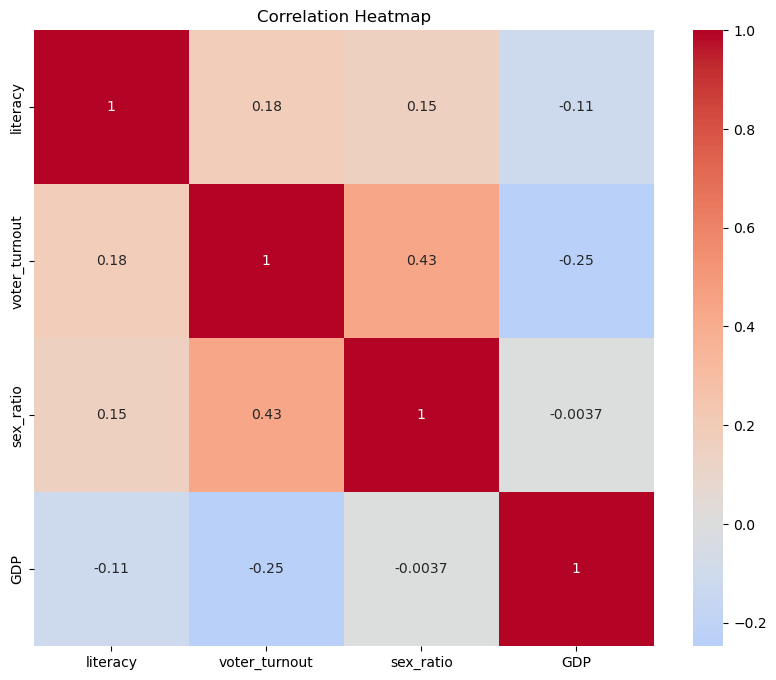

In [479]:
correlation_matrix = plot.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()